#загрузка и чтение данных из файлов#

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data/credit.csv', sep=';', decimal=',')

In [2]:
df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,2,48.0,3.0,15,59998.00,10,0.770249,2.0,28,23.0,8.0,25850.0,30000.0,1.0,1.0,0
1,2,1,28.0,NaN,15,10889.00,6,0.248514,2.0,2,30.0,7.0,66880.0,43000.0,2.0,0.0,0
2,3,2,32.0,3.0,14,10728.00,12,0.459589,4.0,2,64.0,2.0,23430.0,23000.0,5.0,0.0,0
3,4,1,27.0,2.0,14,12009.09,12,0.362536,2.0,2,8.0,8.0,23650.0,17000.0,2.0,0.0,0
4,5,2,45.0,3.0,14,16908.89,10,0.421385,4.0,2,77.0,6.0,26620.0,NaN,1.0,0.0,0


#предварительная обработка данных (очистка и форматирование данных)#

* client_id -Идентификационный номер
* gender - Пол
* age - Возраст
* marital_status - Семейный статус
* job_position - Работа
* credit_sum - Сумма кредита
* credit_month - Срок кредитования
* score_shk - Внутренняя скоринговая оценка
* education - Образование
* tariff_id - Идентификационный номер тарифа
* living_region - Регион
* monthly_income - Месячный заработок
* credit_count - Количество кредитов у клиента
* overdue_credit_count - Количество просроченных кредитов у клиента
* open_account_flg - Факт открытия кредитного счета в данном банке
* avregzarplata - Средняя заработная плата в регионе
* okrug - Федеральный округ

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  float64
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

<Axes: >

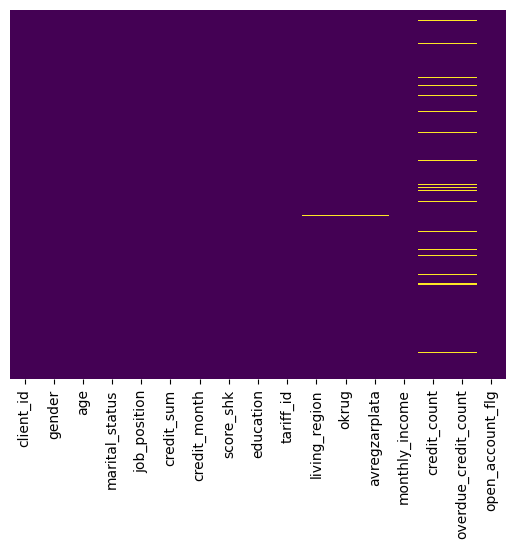

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

1. client_id 170746 non-null  int64   ---> + / корректный столбец, но не нужный, по сути дублирует порядковый номер индекса, можно его удалить
2. gender 170746 non-null  int64  ---> + / корректный столбец, для "большей лучшести" сделать тип int8
3. age 170744 non-null  float64 ---> пропусков мало (около 0,001%), нужно проанализировать, заменить int8
4. marital_status 170741 non-null  float64t ---> +/ корректный столбец , поменять тип
5. job_position 170746 non-null  int64 ---> +/ корректный столбец
6. credit_sum 170745 non-null  float64 ---> / очень мало пропусков
7. credit_month 170746 non-null  int64 --->+ / пропусков нет
8. score_shk 170743 non-null  float64 ---> +/ 0.001% пропусков - корректный столбец
9. education 170743 non-null  float64 ---> +/ 0.001% пропусков - корректный столбец, поменять тип
10. tariff_id 170746 non-null  int64  ---> пропусков нет, корректный
11. living_region 170554 non-null  float64 ---> +/ корректный, пропусков 0.1% поменять тип
12. okrug 170554 non-null  float64 --->  +/ корректный, пропусков 0.1% поменять тип
13. avregzarplata 170554 non-null  float64 ---> +/ корректный, пропусков 0.1% поменять тип
14. monthly_income 170744 non-null  float64 ---> +/корректный, пропусков 0.1% поменять тип
15. credit_count 161516 non-null  float64 ---> +/ много пропусков 5%, поменять тип
16.  overdue_credit_count 161516 non-null  float64 ---> +/ много пропусков 5%, поменять тип
17.  open_account_flg 170746 non-null  int64  ---> + / корректный столбец

##Замена типов и предобработка данных##

In [5]:

def descr_numeric(target_column):
    print(df[target_column].head(7), df[target_column].describe())
    df.boxplot(column=target_column, figsize=(3,7));
    plt.show()
    df[target_column].hist(figsize=(16,3), bins=100);

###Столбец client_id  ###

0    1
1    2
2    3
3    4
4    5
5    6
6    7
Name: client_id, dtype: int64 count    170746.000000
mean      85373.500000
std       49290.268869
min           1.000000
25%       42687.250000
50%       85373.500000
75%      128059.750000
max      170746.000000
Name: client_id, dtype: float64


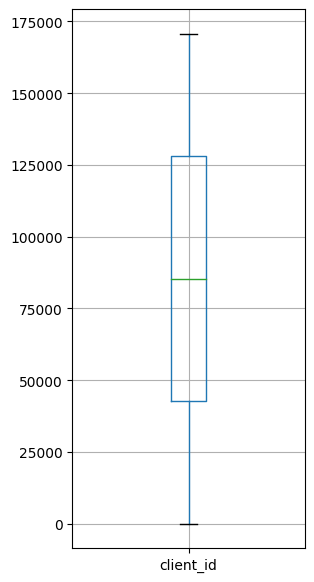

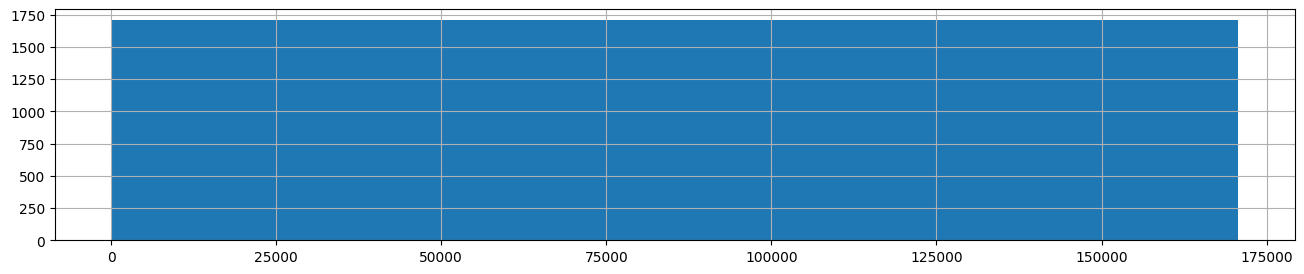

In [6]:
descr_numeric('client_id')

*Вывод: корректный столбец, оставим его*

###Столбец  gender ###

0    2
1    1
2    2
3    1
4    2
5    1
6    2
Name: gender, dtype: int64 count    170746.000000
mean          1.480532
std           0.499622
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: gender, dtype: float64


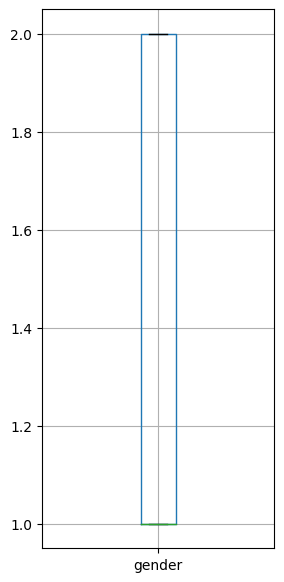

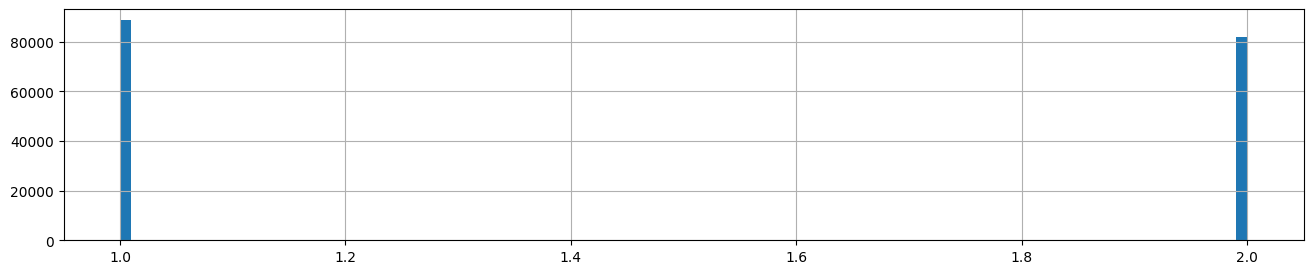

In [7]:
descr_numeric('gender')

In [8]:
df.gender = df.gender.astype('int8')

*Вывод: столбец корректный, поменяли тип, столбцов с гендером 1 больше, чем с гендером 2, но не значительно*

###Столбец age###

0    48.0
1    28.0
2    32.0
3    27.0
4    45.0
5    37.0
6     NaN
Name: age, dtype: float64 count    170744.000000
mean         36.497312
std          10.546067
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max          71.000000
Name: age, dtype: float64


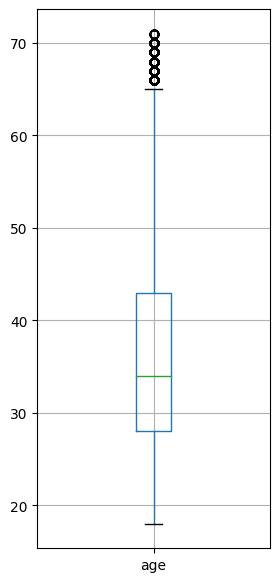

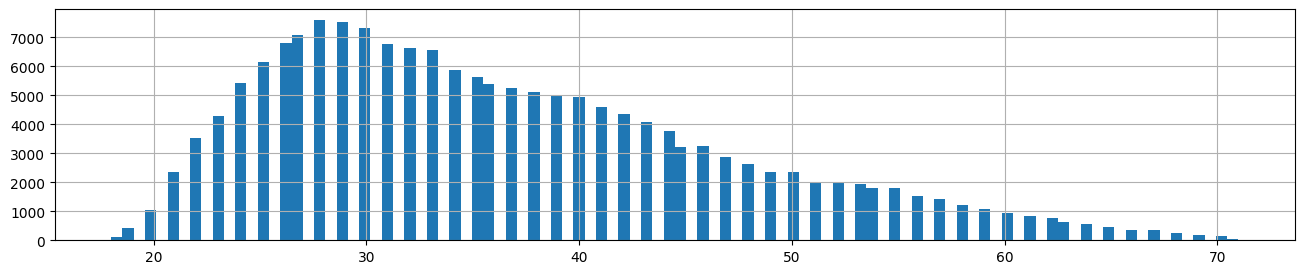

In [9]:
descr_numeric('age')

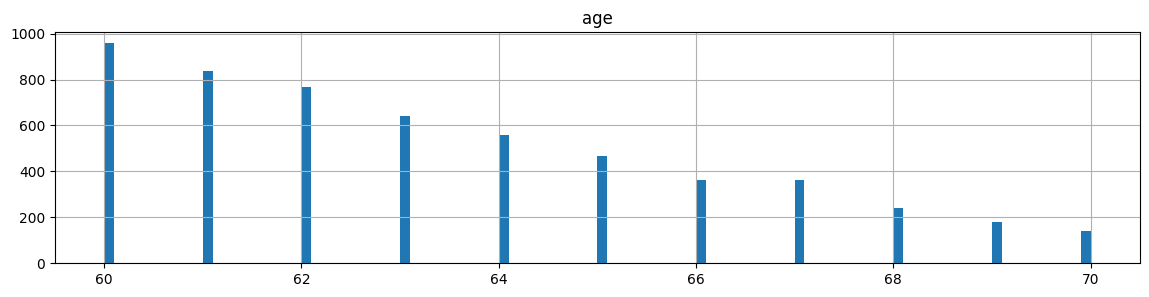

In [10]:
df.hist('age', bins=100, figsize=(14,3), range=(60, 70));

Выбросы довольно равномерные, можно оставить как есть

---


Всего 2 пропущенных значения, можно их удалить, чтобы перевести столбик в int

In [11]:
# Удаляем и переиндексируем
df.dropna(subset = ['age'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170744 entries, 0 to 170743
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170744 non-null  int64  
 1   gender                170744 non-null  int8   
 2   age                   170744 non-null  float64
 3   marital_status        170739 non-null  float64
 4   job_position          170744 non-null  int64  
 5   credit_sum            170743 non-null  float64
 6   credit_month          170744 non-null  int64  
 7   score_shk             170741 non-null  float64
 8   education             170741 non-null  float64
 9   tariff_id             170744 non-null  int64  
 10  living_region         170552 non-null  float64
 11  okrug                 170552 non-null  float64
 12  avregzarplata         170552 non-null  float64
 13  monthly_income        170742 non-null  float64
 14  credit_count          161514 non-null  float64
 15  

In [12]:
df.age = df.age.astype('int8')
df.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 170744 entries, 0 to 170743
Series name: age
Non-Null Count   Dtype
--------------   -----
170744 non-null  int8 
dtypes: int8(1)
memory usage: 166.9 KB


*ВЫВОД: удалили всего 2 строки, менее 0,001% от всего числа. Перевели тип на int 8 Столбец готов*

###Столбец marital_status###

0    3.0
1    NaN
2    3.0
3    2.0
4    3.0
5    3.0
6    4.0
Name: marital_status, dtype: float64 count    170739.000000
mean          3.197588
std           0.738574
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: marital_status, dtype: float64


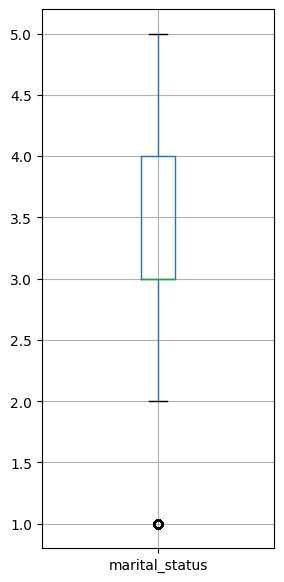

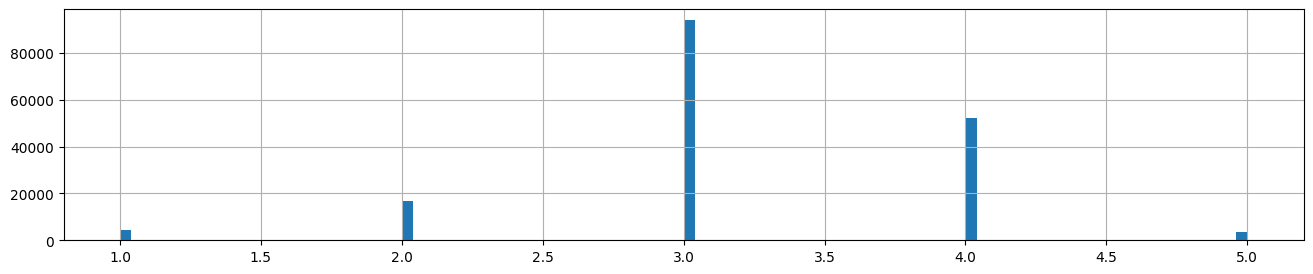

In [13]:
descr_numeric('marital_status')

In [14]:
df.marital_status = df.marital_status.fillna(0).astype('int8')
df.marital_status.info()

<class 'pandas.core.series.Series'>
RangeIndex: 170744 entries, 0 to 170743
Series name: marital_status
Non-Null Count   Dtype
--------------   -----
170744 non-null  int8 
dtypes: int8(1)
memory usage: 166.9 KB


*Есть 5 нулевых значений, Заменим их на 0, так как данных значений нет в столбце. Нужно это запомнить, для дальнейшей оценки*

###Столбец jobe_position###

0    15
1    15
2    14
3    14
4    14
5    14
6    14
Name: job_position, dtype: int64 count    170744.000000
mean         13.160006
std           3.132438
min           1.000000
25%          14.000000
50%          14.000000
75%          14.000000
max          18.000000
Name: job_position, dtype: float64


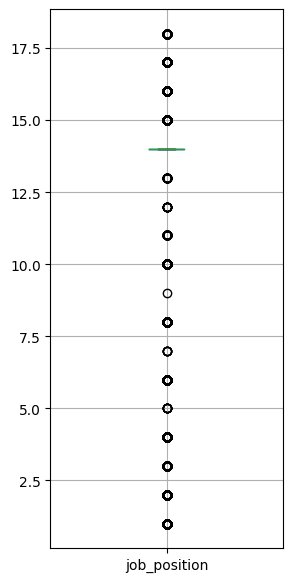

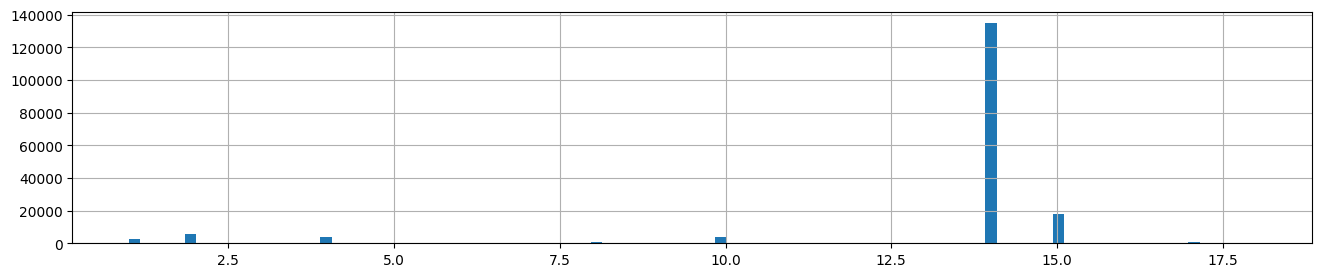

In [15]:
descr_numeric('job_position')

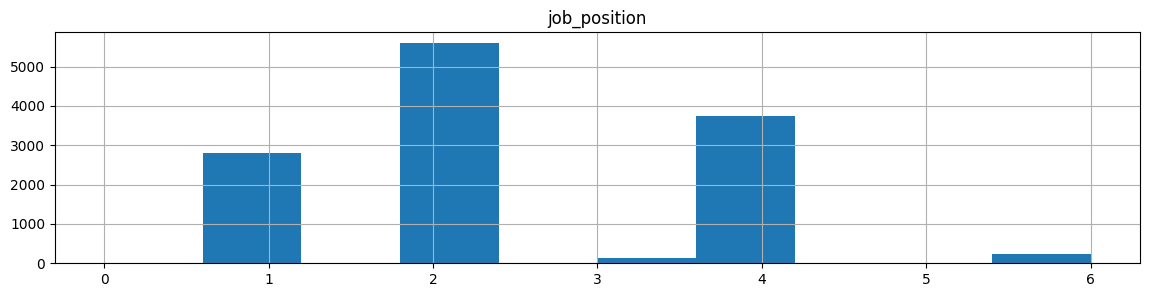

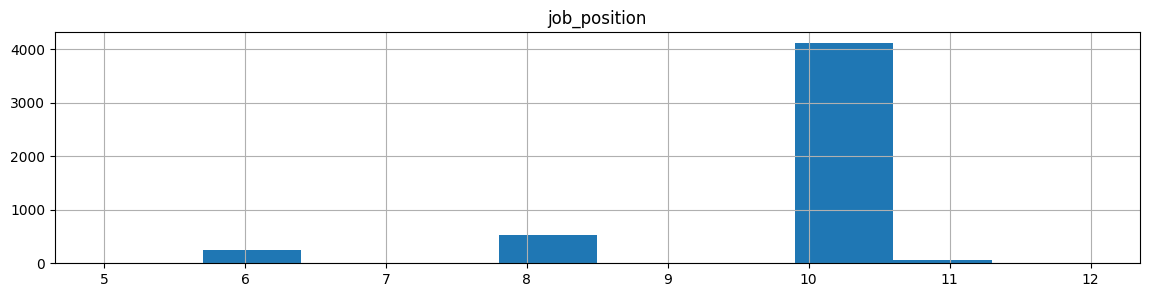

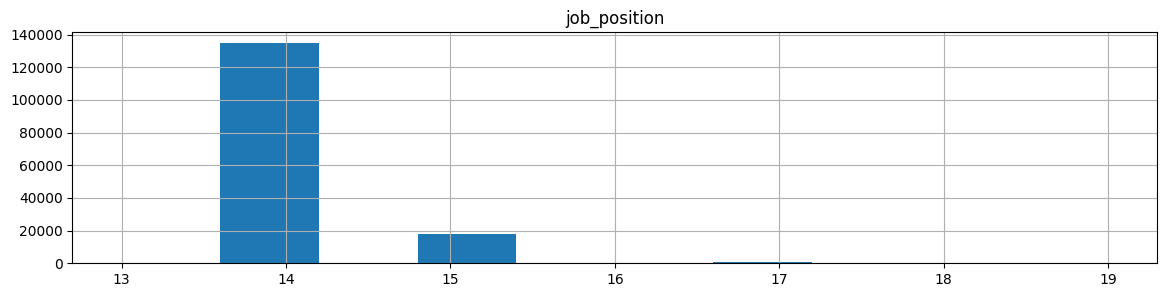

In [16]:
df.hist('job_position', bins=10, figsize=(14,3), range=(0, 6));
df.hist('job_position', bins=10, figsize=(14,3), range=(5, 12));
df.hist('job_position', bins=10, figsize=(14,3), range=(13, 19));

In [17]:
df.job_position.value_counts(normalize=True)

14    0.788771
15    0.103512
2     0.032745
10    0.024054
4     0.021963
1     0.016346
17    0.003842
8     0.003145
16    0.002062
6     0.001411
3     0.000738
18    0.000644
11    0.000381
13    0.000234
12    0.000070
5     0.000047
7     0.000029
9     0.000006
Name: job_position, dtype: float64

*Вывод: Некторых данных очень мало, самая 'популярная' позиция профессия в банке 14, профессия 15, это целевые пользователи банка*

###Столбец  credit_sum###

0    59998.00
1    10889.00
2    10728.00
3    12009.09
4    16908.89
5    26788.00
6    47878.00
Name: credit_sum, dtype: float64 count    170743.000000
mean      26095.270158
std       16234.846480
min        2736.000000
25%       14908.000000
50%       21229.000000
75%       32068.000000
max      200000.000000
Name: credit_sum, dtype: float64


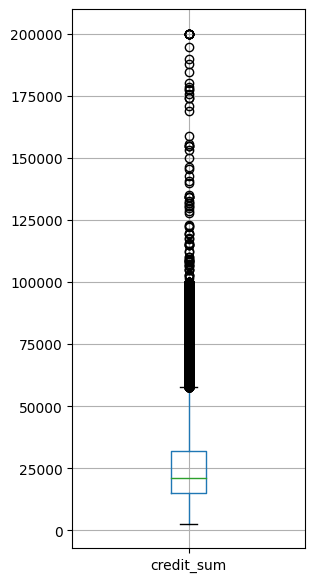

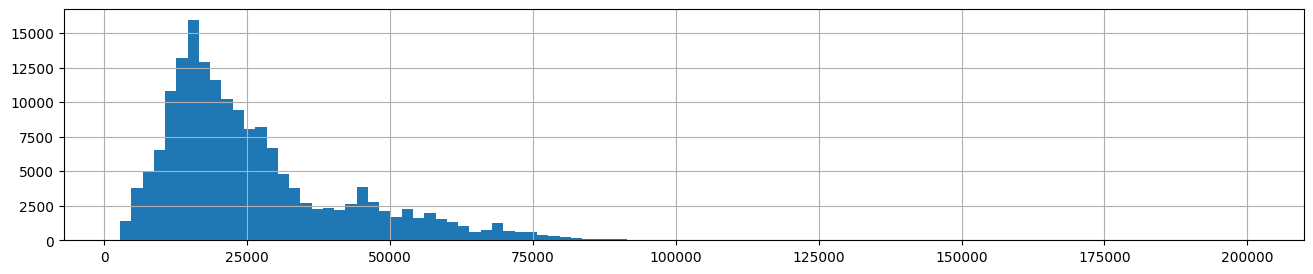

In [18]:
descr_numeric('credit_sum')

проверить пропуски, если в количестве кредитов стоит ноль, зменить значения на 0

In [19]:
print(df['credit_sum'].value_counts())
print()
print("Кол-во пропущеных значений", df['credit_sum'].isna().sum())
print()
display(df['credit_sum'].sort_values().unique())

22990.00    618
53189.00    521
39990.00    461
57789.00    452
23990.00    433
           ... 
10482.00      1
56035.80      1
47328.00      1
21365.10      1
27556.47      1
Name: credit_sum, Length: 42769, dtype: int64

Кол-во пропущеных значений 1



array([  2736. ,   3000. ,   3000.4, ..., 194570. , 200000. ,      nan])

In [20]:
print('Распределение пропусков по наличию кредитов:')
open_exp = pd.DataFrame()
open_exp = df.groupby(df[df['credit_sum'].isna()==True]['open_account_flg'])['open_account_flg'].count(). \
                                                          sort_values(ascending=False)



display(open_exp)

Распределение пропусков по наличию кредитов:


open_account_flg
0.0    1
Name: open_account_flg, dtype: int64

In [21]:
df['credit_sum'] = df['credit_sum'].fillna(df['open_account_flg'])

*В целом распределение выглядит нормальным*

###Столбец credit_month ###

0    10
1     6
2    12
3    12
4    10
5    10
6    10
Name: credit_month, dtype: int64 count    170744.000000
mean         10.980784
std           3.536697
min           3.000000
25%          10.000000
50%          10.000000
75%          12.000000
max          36.000000
Name: credit_month, dtype: float64


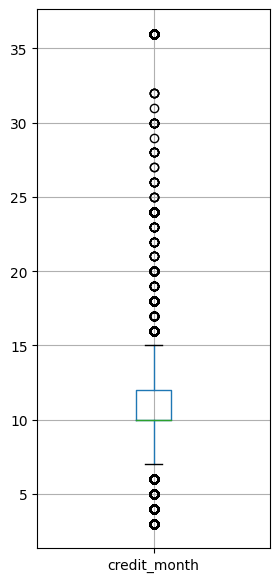

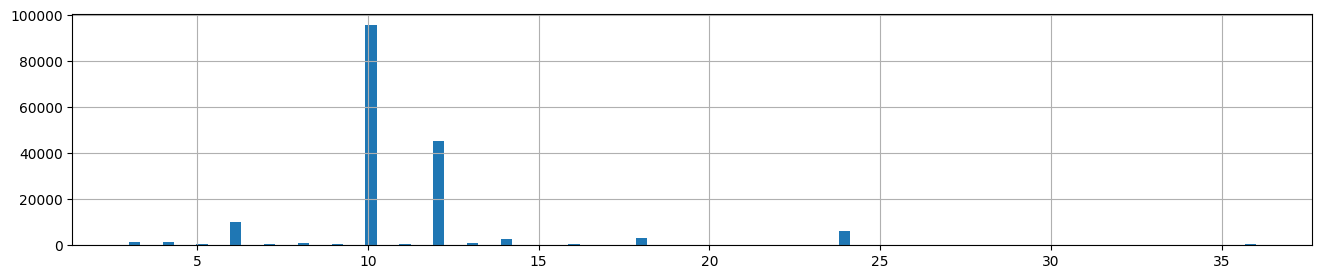

In [22]:
descr_numeric('credit_month')

*Разброс от 3 до 36 месяцев, вполне реально, можно ничего не менять *

###Столбец score_shk###

0    0.770249
1    0.248514
2    0.459589
3    0.362536
4    0.421385
5    0.484203
6    0.512525
Name: score_shk, dtype: float64 count    170741.000000
mean          0.469472
std           0.124268
min           0.000000
25%           0.379495
50%           0.461599
75%           0.552427
max           1.128291
Name: score_shk, dtype: float64


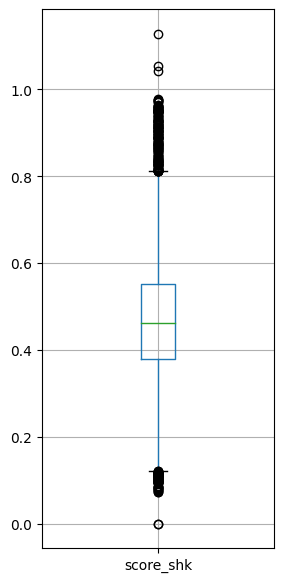

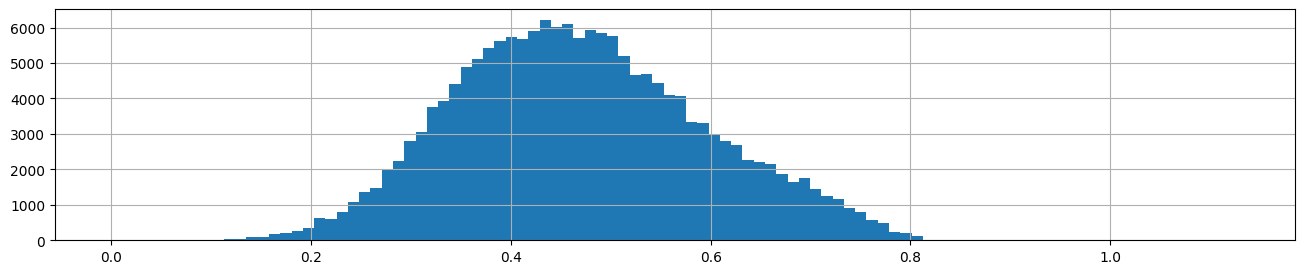

In [23]:
descr_numeric('score_shk')

*Есть как сильно болшие (1) так очень маленькие значения (0). Рассмотрим всё на графиках.*

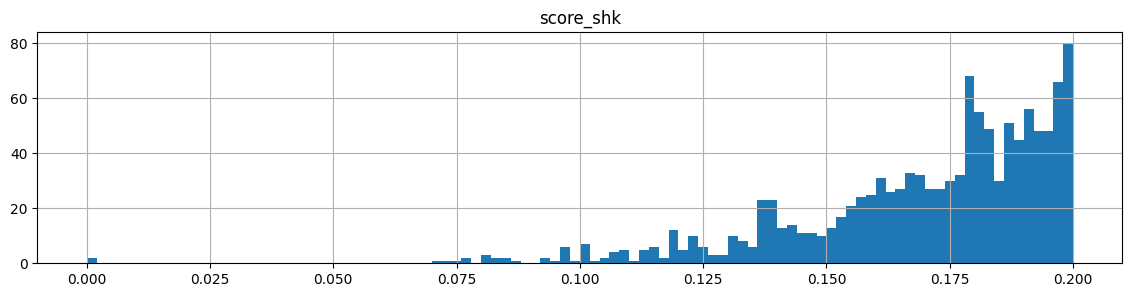

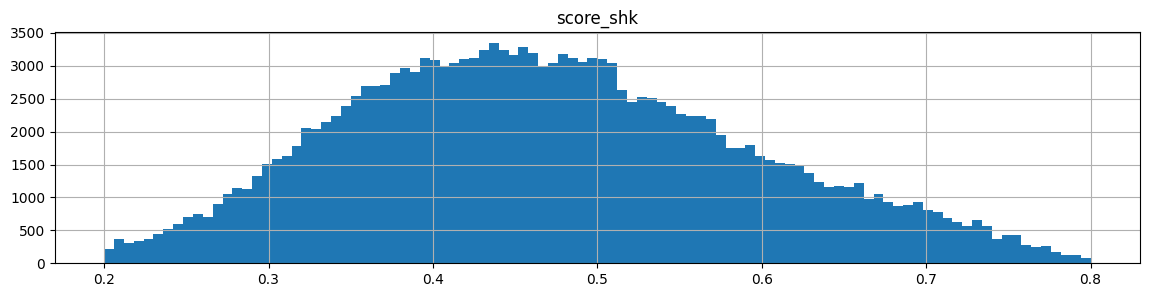

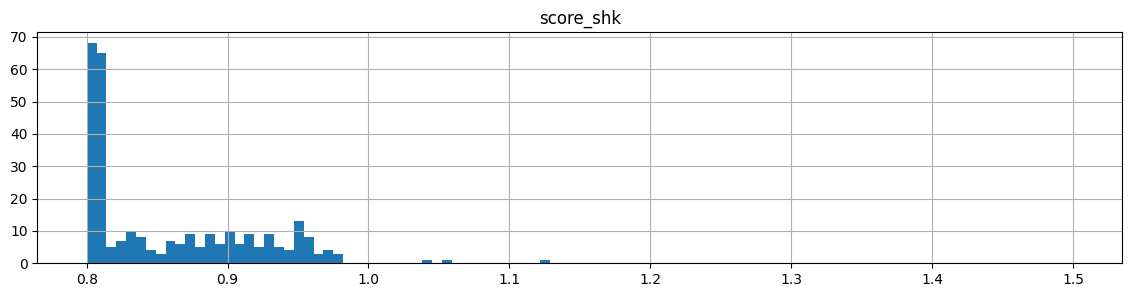

In [24]:
basket = 100
df.hist('score_shk', bins=basket, figsize=(14,3), range=(0, 0.2));
df.hist('score_shk', bins=basket, figsize=(14,3), range=(0.2, 0.8));
df.hist('score_shk', bins=basket, figsize=(14,3), range=(0.8, 1.5));

*score_shk - это внутренняя скоринговая оценка, выбросы можно не убирать, так как нам нужно составить портрет клиента, а не оценить риски для выдачи кредита*

###Столбец education ###

In [25]:
df.education = df.education.fillna(0).astype('int8')
df.education.info()

<class 'pandas.core.series.Series'>
RangeIndex: 170744 entries, 0 to 170743
Series name: education
Non-Null Count   Dtype
--------------   -----
170744 non-null  int8 
dtypes: int8(1)
memory usage: 166.9 KB


0    2
1    2
2    4
3    2
4    4
5    4
6    2
Name: education, dtype: int8 count    170744.000000
mean          3.202648
std           1.064104
min           0.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: education, dtype: float64


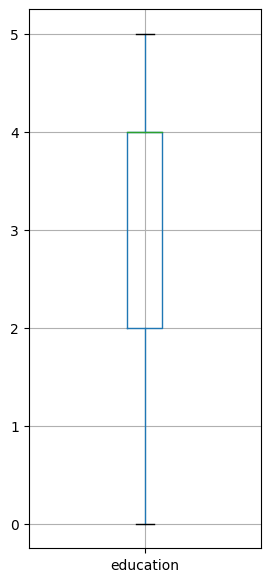

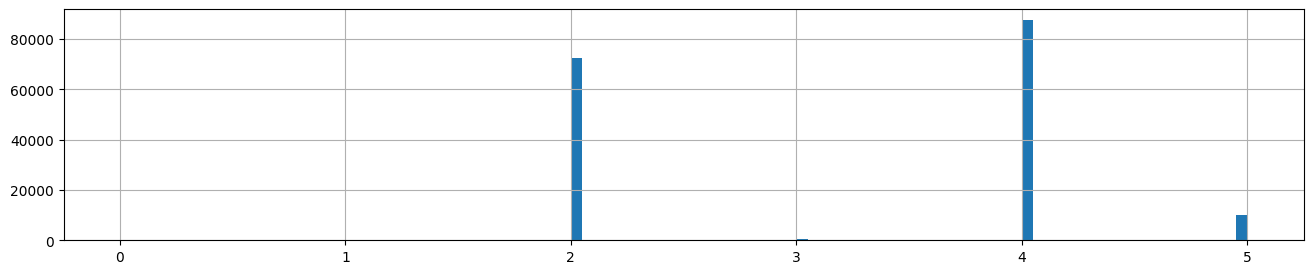

In [26]:
descr_numeric('education')

In [27]:
df.education.value_counts()

4    87535
2    72593
5     9941
3      565
1      107
0        3
Name: education, dtype: int64

*Есть 3 нулевых значений, замених их также на 0, для перевода типа данных, нужно запомнить, для дальнейшей оценки*

###Столбец living_region ###

0    23.0
1    30.0
2    64.0
3     8.0
4    77.0
5    68.0
6    31.0
Name: living_region, dtype: float64 count    170552.000000
mean         43.010085
std          22.219876
min           1.000000
25%          25.000000
50%          40.000000
75%          63.000000
max          82.000000
Name: living_region, dtype: float64


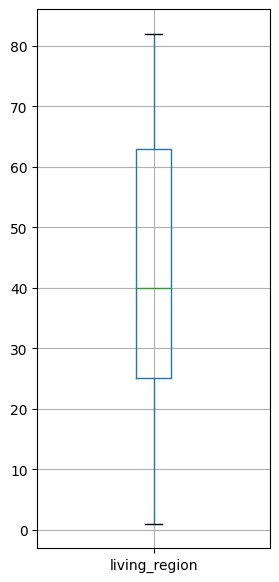

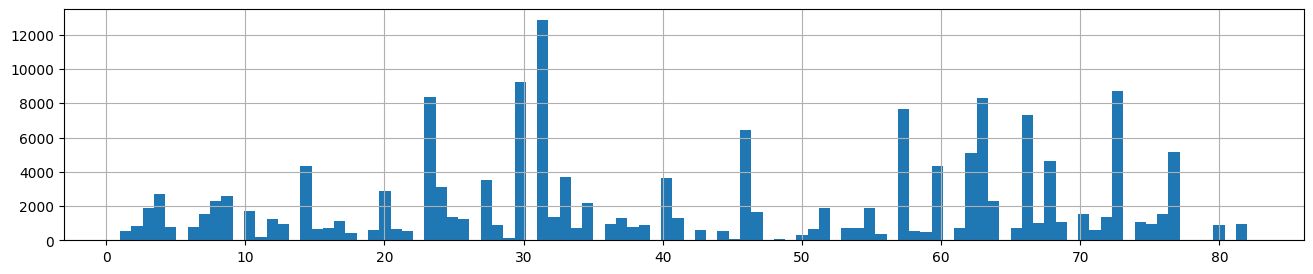

In [28]:
descr_numeric('living_region')

In [29]:
print(df['living_region'].value_counts())
print()
print("Кол-во пропущеных значений", df['living_region'].isna().sum())
print()
display(df['living_region'].sort_values().unique())

31.0    12844
30.0     9261
73.0     8735
23.0     8355
63.0     8303
        ...  
45.0       54
81.0       32
78.0       31
49.0       19
79.0       17
Name: living_region, Length: 81, dtype: int64

Кол-во пропущеных значений 192



array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
       67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79.,
       80., 81., 82., nan])

Всего пропусков 192. Все регионы прописаны с 1спо 82 без пропусков

In [30]:
nan_loc_df = df.loc[df['living_region'].isna()==True, ['okrug', 'avregzarplata']]
nan_loc_df

,okrug,avregzarplata
576,NaN,NaN
917,NaN,NaN
1919,NaN,NaN
2800,NaN,NaN
5631,NaN,NaN
...,...,...
166719,NaN,NaN
168489,NaN,NaN
168966,NaN,NaN
169668,NaN,NaN


In [31]:
nan_loc_df = nan_loc_df.dropna(subset=['okrug', 'avregzarplata'])
nan_loc_df['loc_list'] = np.nan
nan_loc_df

,okrug,avregzarplata,loc_list


 Заполнить примерно регионы по столбцам округа не удастся, заменим значения на 0 и переведем в тип инт для дальнейшей работы

In [32]:
df.living_region = df.living_region.fillna(0).astype('int8')
df.living_region.info()

<class 'pandas.core.series.Series'>
RangeIndex: 170744 entries, 0 to 170743
Series name: living_region
Non-Null Count   Dtype
--------------   -----
170744 non-null  int8 
dtypes: int8(1)
memory usage: 166.9 KB


###Столбец okrug###

0    8.0
1    7.0
2    2.0
3    8.0
4    6.0
5    4.0
6    7.0
Name: okrug, dtype: float64 count    170552.000000
mean          4.817135
std           2.263187
min           1.000000
25%           2.000000
50%           5.000000
75%           7.000000
max           8.000000
Name: okrug, dtype: float64


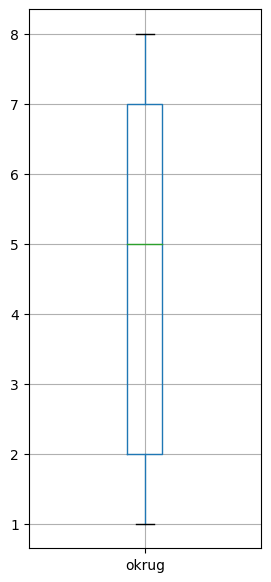

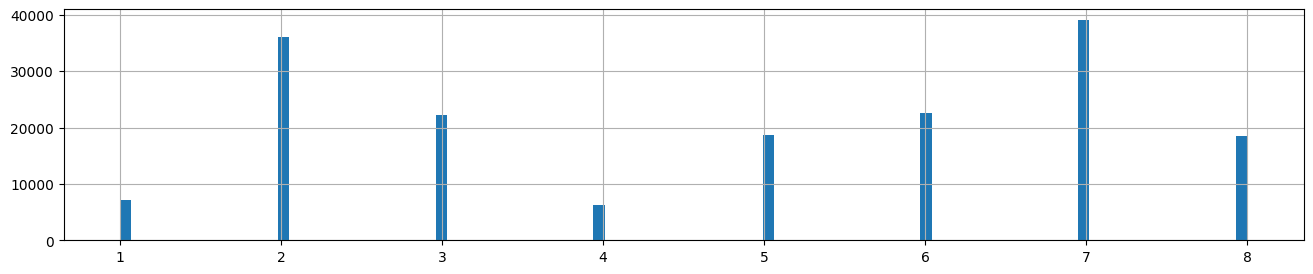

In [33]:
descr_numeric('okrug')

In [34]:
df.okrug = df.okrug.fillna(0).astype('int8')
df.okrug.info()

<class 'pandas.core.series.Series'>
RangeIndex: 170744 entries, 0 to 170743
Series name: okrug
Non-Null Count   Dtype
--------------   -----
170744 non-null  int8 
dtypes: int8(1)
memory usage: 166.9 KB


также заменим пропущенные значение в округе на 0

###Столбец avregzarplata ###

0    25850.0
1    66880.0
2    23430.0
3    23650.0
4    26620.0
5    22000.0
6    42460.0
Name: avregzarplata, dtype: float64 count    170552.000000
mean      32957.772058
std       12577.506049
min       16830.000000
25%       25520.000000
50%       27390.000000
75%       42460.000000
max       66880.000000
Name: avregzarplata, dtype: float64


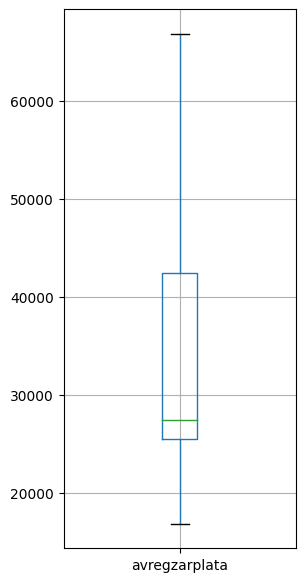

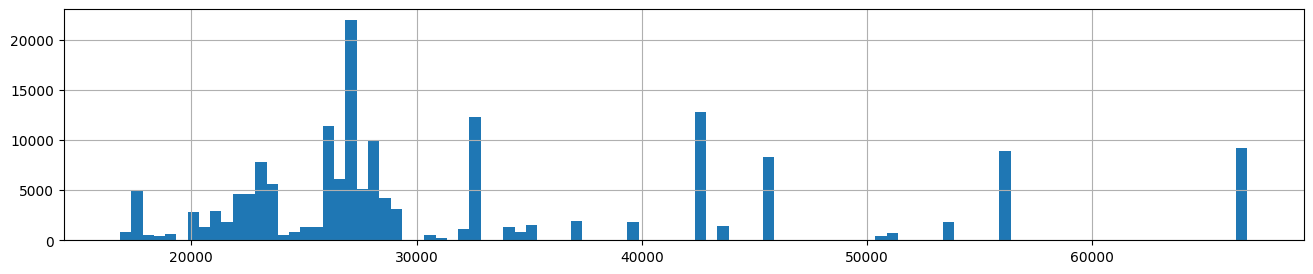

In [35]:
descr_numeric('avregzarplata')

In [36]:
print("Кол-во пропусков стало =", df['avregzarplata'].isna().sum())

Кол-во пропусков стало = 192


In [37]:
df['avregzarplata'] = df['avregzarplata'].fillna(27390)
print("Кол-во пропусков стало =", df['avregzarplata'].isna().sum())

Кол-во пропусков стало = 0


выбросов нет

###Столбец monthly_income###

0    30000.0
1    43000.0
2    23000.0
3    17000.0
4        NaN
5    30000.0
6    60000.0
Name: monthly_income, dtype: float64 count    170742.000000
mean      40138.484058
std       25044.376923
min        5000.000000
25%       25000.000000
50%       35000.000000
75%       50000.000000
max      950000.000000
Name: monthly_income, dtype: float64


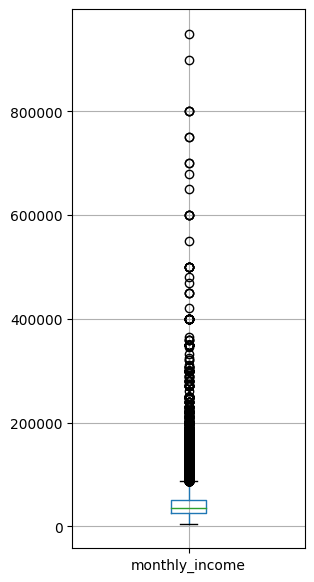

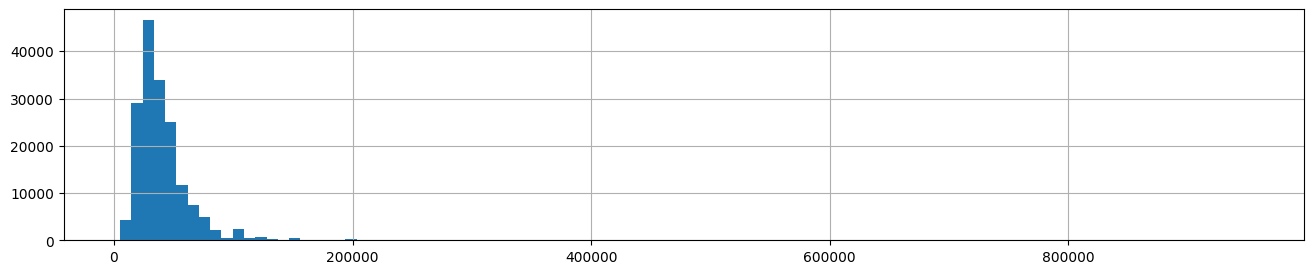

In [38]:
descr_numeric('monthly_income')

*Есть как сильно большие (950000) так очень маленькие значения (16830). Рассмотрим всё на графиках.*

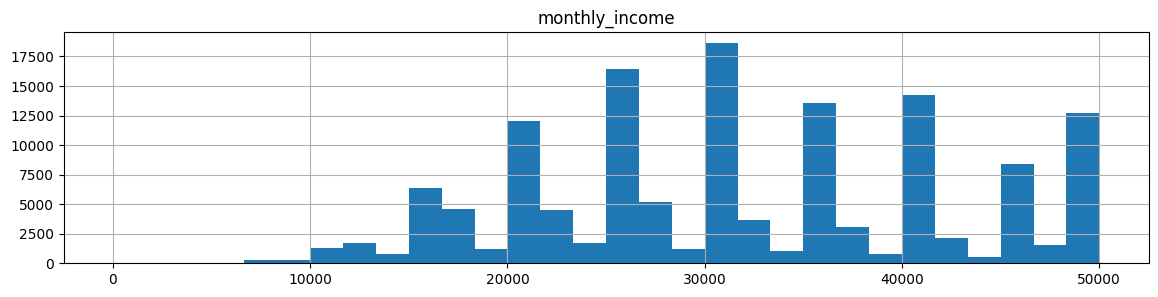

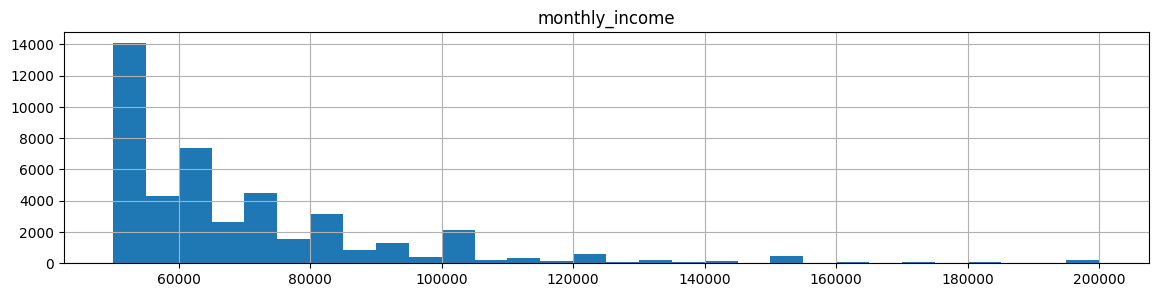

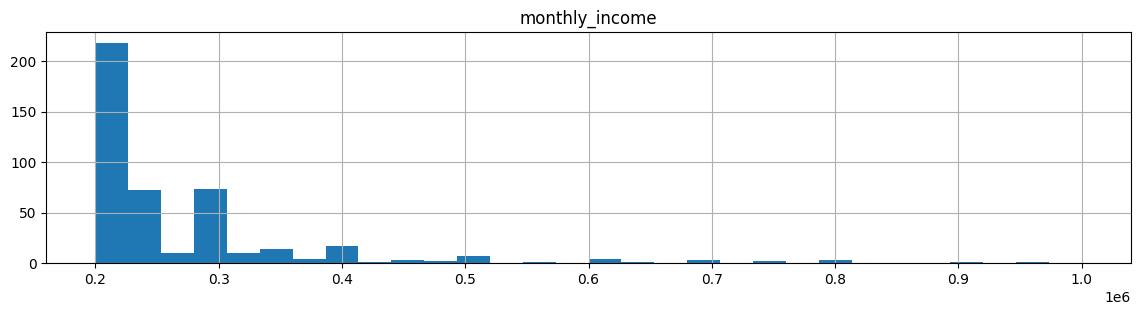

In [39]:
basket = 30
df.hist('monthly_income', bins=basket, figsize=(14,3), range=(0, 50000));
df.hist('monthly_income', bins=basket, figsize=(14,3), range=(50000, 200000));
df.hist('monthly_income', bins=basket, figsize=(14,3), range=(200000, 1000000));

*В принипе пропусков мало можно их и удалить, но всетаки, заполним их медианой всего столбца, большого влияния (в худшем случае) на анализ оказать не должно*

In [40]:
df['monthly_income'] = df['monthly_income'].fillna(35000)
print("Кол-во пропусков стало =", df['monthly_income'].isna().sum())

Кол-во пропусков стало = 0


### Столбец credit_count###


0    1.0
1    2.0
2    5.0
3    2.0
4    1.0
5    0.0
6    3.0
Name: credit_count, dtype: float64 count    161514.000000
mean          2.107303
std           1.777138
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          21.000000
Name: credit_count, dtype: float64


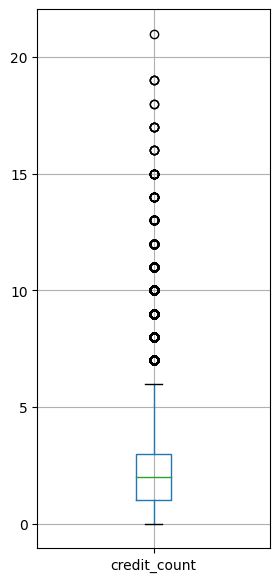

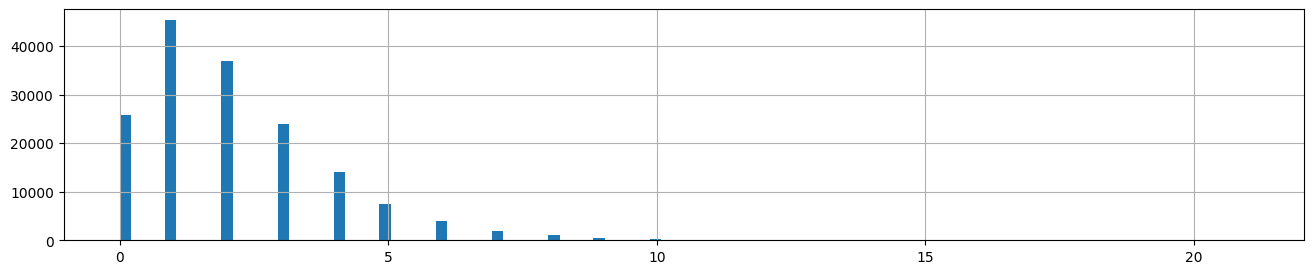

In [41]:
descr_numeric('credit_count')

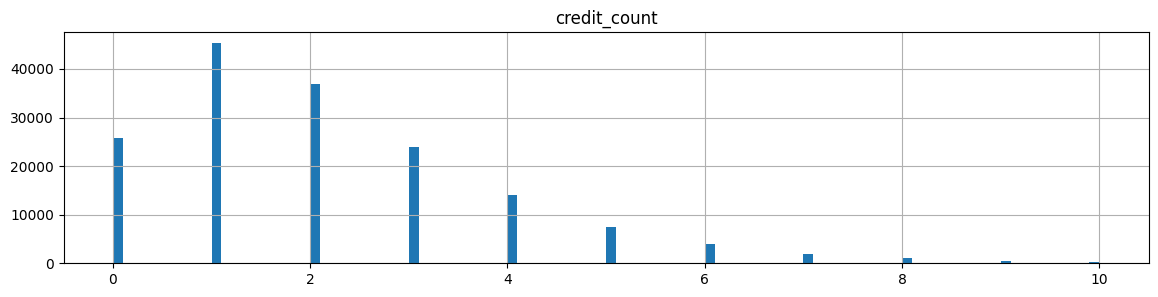

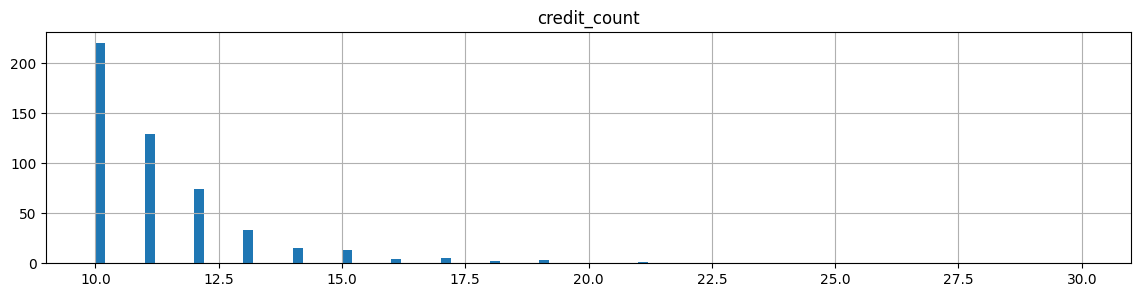

In [42]:
df.hist('credit_count', bins=100, figsize=(14,3), range=(0, 10));
df.hist('credit_count', bins=100, figsize=(14,3), range=(10, 30));

In [43]:
print(df['credit_count'].value_counts())
print()
print("Кол-во пропущеных значений", df['credit_count'].isna().sum())
print()
display(df['credit_count'].sort_values().unique())

1.0     45279
2.0     36997
0.0     25806
3.0     23917
4.0     14113
5.0      7543
6.0      3915
7.0      1962
8.0      1007
9.0       476
10.0      220
11.0      129
12.0       74
13.0       33
14.0       15
15.0       13
17.0        5
16.0        4
19.0        3
18.0        2
21.0        1
Name: credit_count, dtype: int64

Кол-во пропущеных значений 9230



array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 21., nan])

пропущено 9230 значения, можно попробовать заполнить часть

In [44]:
nan_loc_df = df.loc[df['credit_count'].isna()==True, ['overdue_credit_count', 'open_account_flg']]
nan_loc_df

,overdue_credit_count,open_account_flg
23,NaN,1
48,NaN,0
50,NaN,0
70,NaN,1
72,NaN,0
...,...,...
170636,NaN,0
170684,NaN,1
170696,NaN,1
170725,NaN,0


In [45]:
nan_loc_df = nan_loc_df.dropna(subset=['overdue_credit_count', 'open_account_flg'])
nan_loc_df['loc_list'] = np.nan
nan_loc_df

,overdue_credit_count,open_account_flg,loc_list


Можно заменить все значения Nan на 0, где отрицательный флаг

По точному количесвту кредитов заменить сложнее, так как информация по отсутвию кредитов отсутсвует, но так как есть факт откртия кредитов, данные можно заменить хотя бы на один кредит и нет кредитов

In [46]:
print('Распределение пропусков по наличию кредитов:')
open_exp = pd.DataFrame()
open_exp = df.groupby(df[df['credit_count'].isna()==True]['open_account_flg'])['open_account_flg'].count(). \
                                                          sort_values(ascending=False)

#df.groupby(df.loc[df['credit_count'].isna()==True,'open_account_flg'])['open_account_flg'].count(). \
 #                                                                                sort_values(ascending=False).head(20)

display(open_exp)

Распределение пропусков по наличию кредитов:


open_account_flg
0.0    5781
1.0    3449
Name: open_account_flg, dtype: int64

In [47]:
df['credit_count'] = df['credit_count'].fillna(df['open_account_flg'])

In [48]:
df.credit_count = df.credit_count.astype('int8')

*Выоды: заменили все значения на инт, поменяили пустые значения на 0, где open_account_flg было 0, и на 1, где были факты открытия кредита*

###Столбец overdue_credit_count###

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: overdue_credit_count, dtype: float64 count    161514.000000
mean          0.046070
std           0.211549
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: overdue_credit_count, dtype: float64


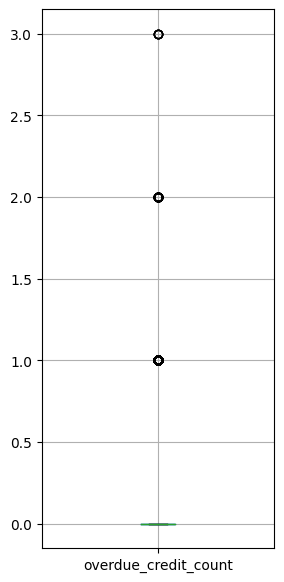

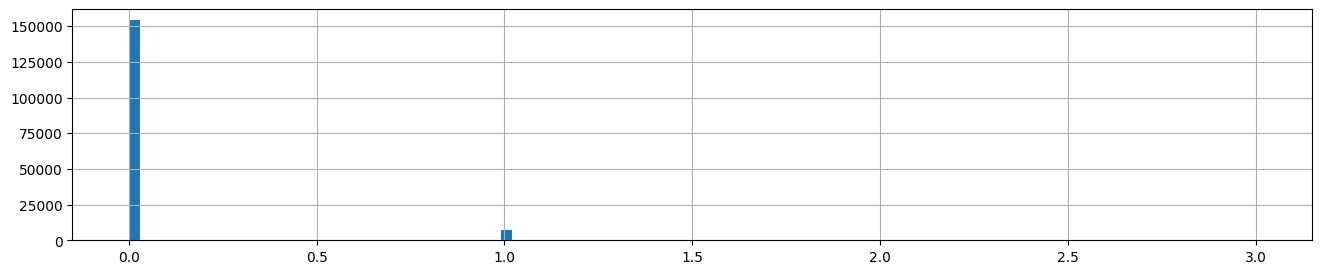

In [49]:
descr_numeric('overdue_credit_count')

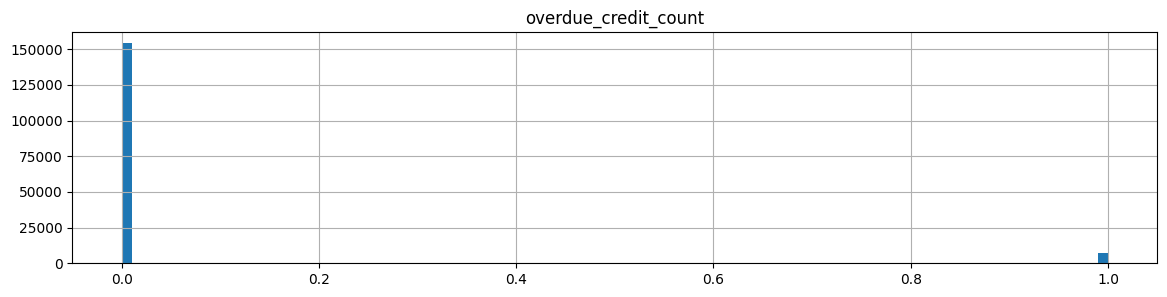

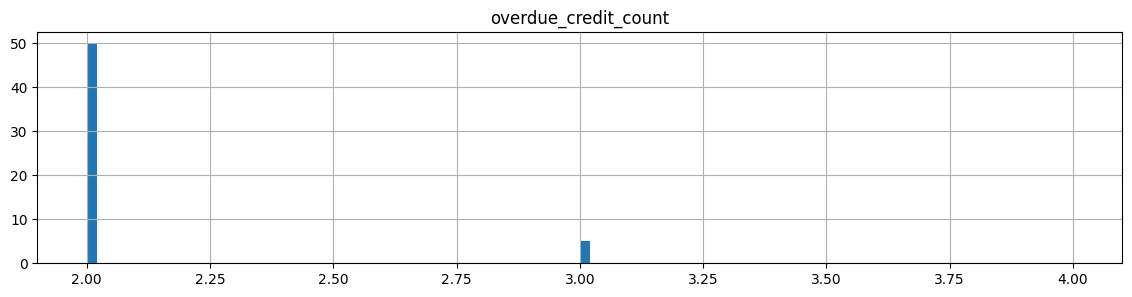

In [50]:
df.hist('overdue_credit_count', bins=100, figsize=(14,3), range=(0, 1));
df.hist('overdue_credit_count', bins=100, figsize=(14,3), range=(2, 4));

также можно заменить все пропуски где нули в столбце open_account_flg на 0, остальные удалить, так как сказать, сколько именнно не закрытых кредитов нельзя

In [51]:
print('Распределение пропусков по наличию кредитов:')
open_exp1 = pd.DataFrame()
open_exp1 = df.groupby(df[df['overdue_credit_count'].isna()==True]['open_account_flg'])['open_account_flg'].count(). \
                                                          sort_values(ascending=False)

#df.groupby(df.loc[df['credit_count'].isna()==True,'open_account_flg'])['open_account_flg'].count(). \
 #                                                                                sort_values(ascending=False).head(20)

display(open_exp1)

Распределение пропусков по наличию кредитов:


open_account_flg
0.0    5781
1.0    3449
Name: open_account_flg, dtype: int64

In [52]:
df.loc[df['open_account_flg'] == 0, 'overdue_credit_count'] = 0

In [53]:
df = df.dropna(subset=['overdue_credit_count'])

In [54]:
df.reset_index(inplace=True, drop=True)

In [55]:
df.overdue_credit_count = df.overdue_credit_count.astype('int8')

<ipython-input-55-854f1dafcc30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.overdue_credit_count = df.overdue_credit_count.astype('int8')


*Вывод: заменены часть значений на 0, часть удалены, заменен тип на инт*

###Столбец open_account_flg ###

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: open_account_flg, dtype: int64 count    167295.000000
mean          0.159042
std           0.365717
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: open_account_flg, dtype: float64


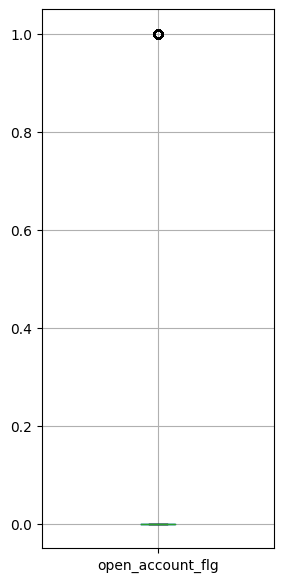

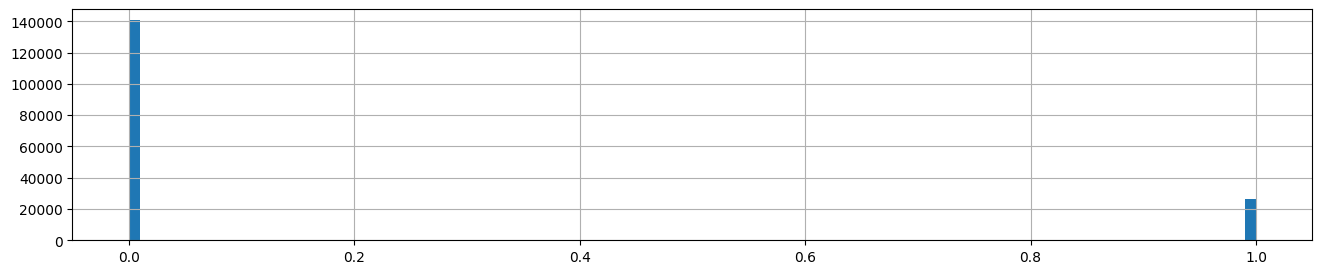

In [56]:
descr_numeric('open_account_flg')

In [57]:
df.open_account_flg = df.open_account_flg.astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167295 entries, 0 to 167294
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             167295 non-null  int64  
 1   gender                167295 non-null  int8   
 2   age                   167295 non-null  int8   
 3   marital_status        167295 non-null  int8   
 4   job_position          167295 non-null  int64  
 5   credit_sum            167295 non-null  float64
 6   credit_month          167295 non-null  int64  
 7   score_shk             167292 non-null  float64
 8   education             167295 non-null  int8   
 9   tariff_id             167295 non-null  int64  
 10  living_region         167295 non-null  int8   
 11  okrug                 167295 non-null  int8   
 12  avregzarplata         167295 non-null  float64
 13  monthly_income        167295 non-null  float64
 14  credit_count          167295 non-null  int8   
 15  

*Столбец менять не будем, Среди всех клиентов, преобладают те, кто не брал кредиты в банке *

##Поиск дубликатов##

In [58]:
df.duplicated().sum()

0

*дубликатов нет*

# исследовательский анализ данных #

In [59]:
df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,2,48,3,15,59998.00,10,0.770249,2,28,23,8,25850.0,30000.0,1,0,0
1,2,1,28,0,15,10889.00,6,0.248514,2,2,30,7,66880.0,43000.0,2,0,0
2,3,2,32,3,14,10728.00,12,0.459589,4,2,64,2,23430.0,23000.0,5,0,0
3,4,1,27,2,14,12009.09,12,0.362536,2,2,8,8,23650.0,17000.0,2,0,0
4,5,2,45,3,14,16908.89,10,0.421385,4,2,77,6,26620.0,35000.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167290,170742,1,27,4,14,64867.00,12,0.535257,2,2,57,2,27060.0,40000.0,6,0,0
167291,170743,1,24,3,14,17640.00,6,0.573287,4,28,63,3,45430.0,30000.0,1,0,0
167292,170744,1,31,4,14,27556.47,10,0.416098,2,19,41,1,33990.0,40000.0,1,0,0
167293,170745,1,53,2,10,6189.00,12,0.482595,4,2,39,2,22990.0,31000.0,2,0,0


##анализ данных с целью выделения портрета клиентов, которые будут и не будут  открывать карту##

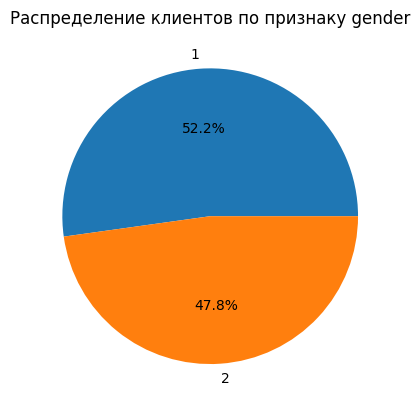

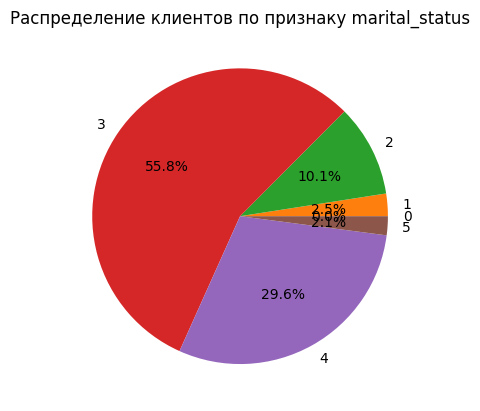

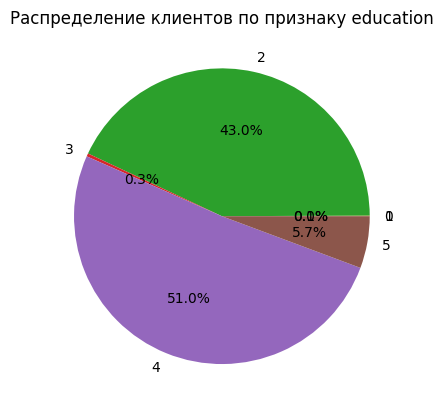

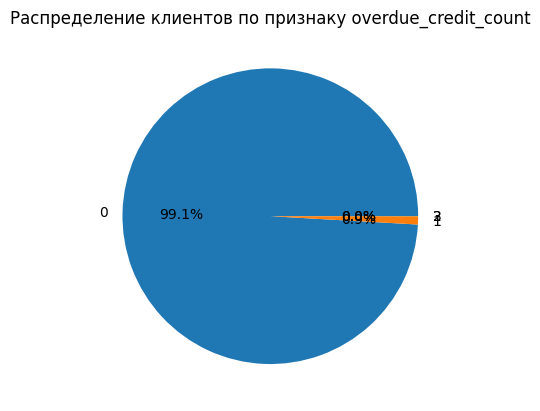

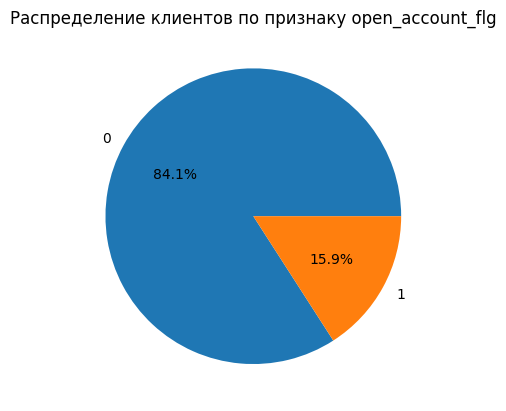

In [60]:
for column in ['gender','marital_status', 'education', 'overdue_credit_count', 'open_account_flg']:
    data = df.groupby(column).agg({'client_id': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(data['client_id'], labels=data.index, autopct='%1.1f%%')
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

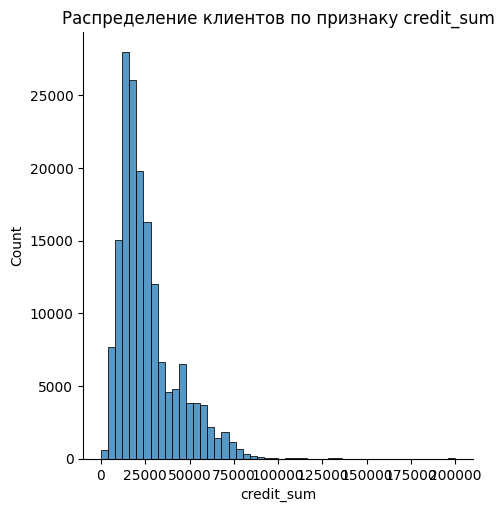

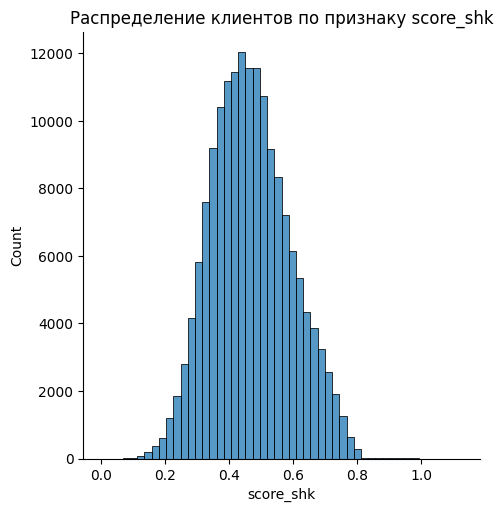

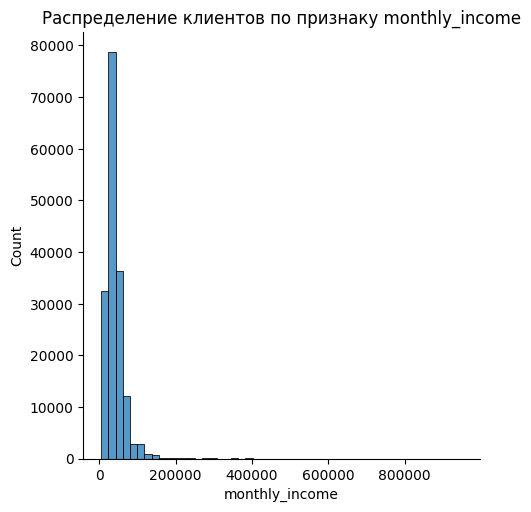

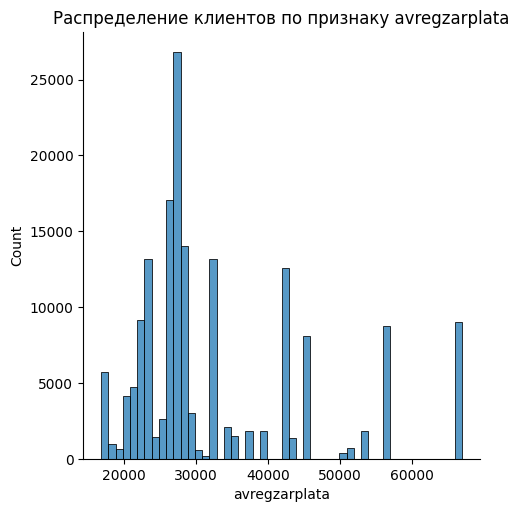

In [61]:
for column in ['credit_sum','score_shk','monthly_income', 'avregzarplata']:
    sns.displot(df[column], kind='hist', bins=50)
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

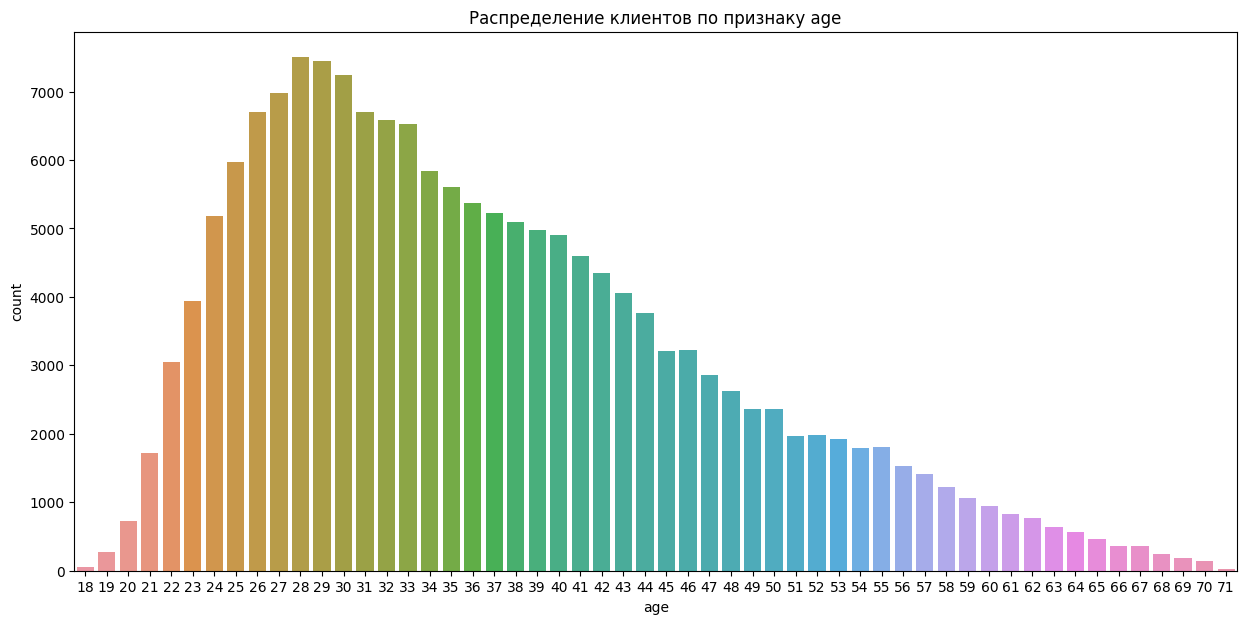

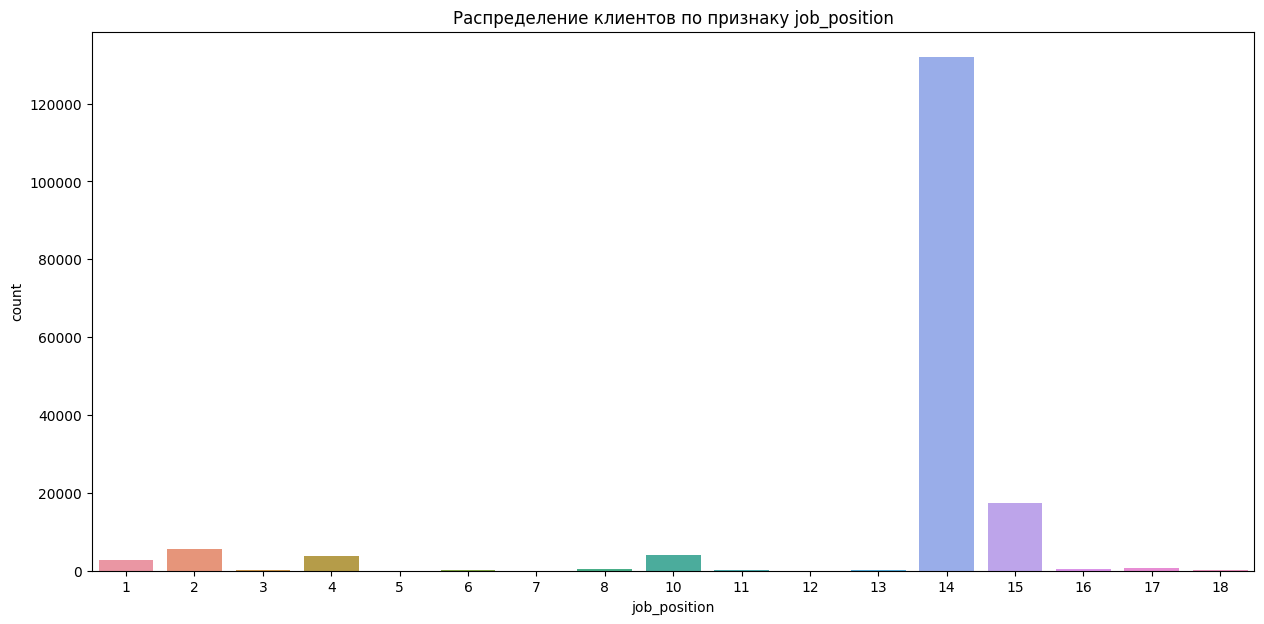

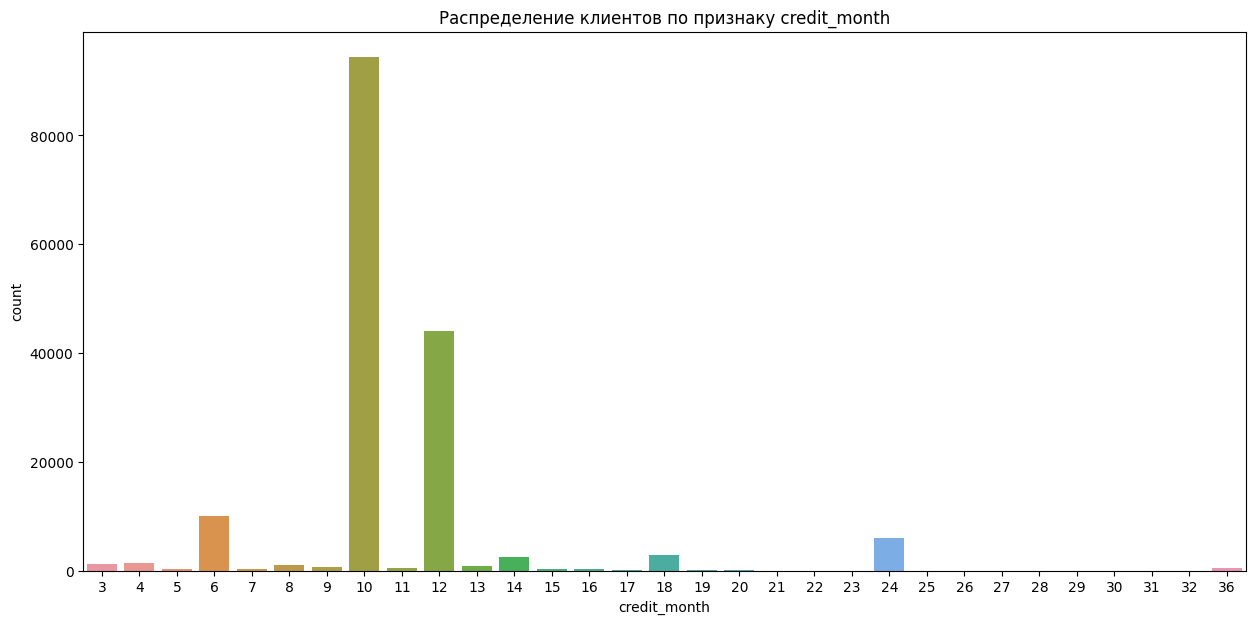

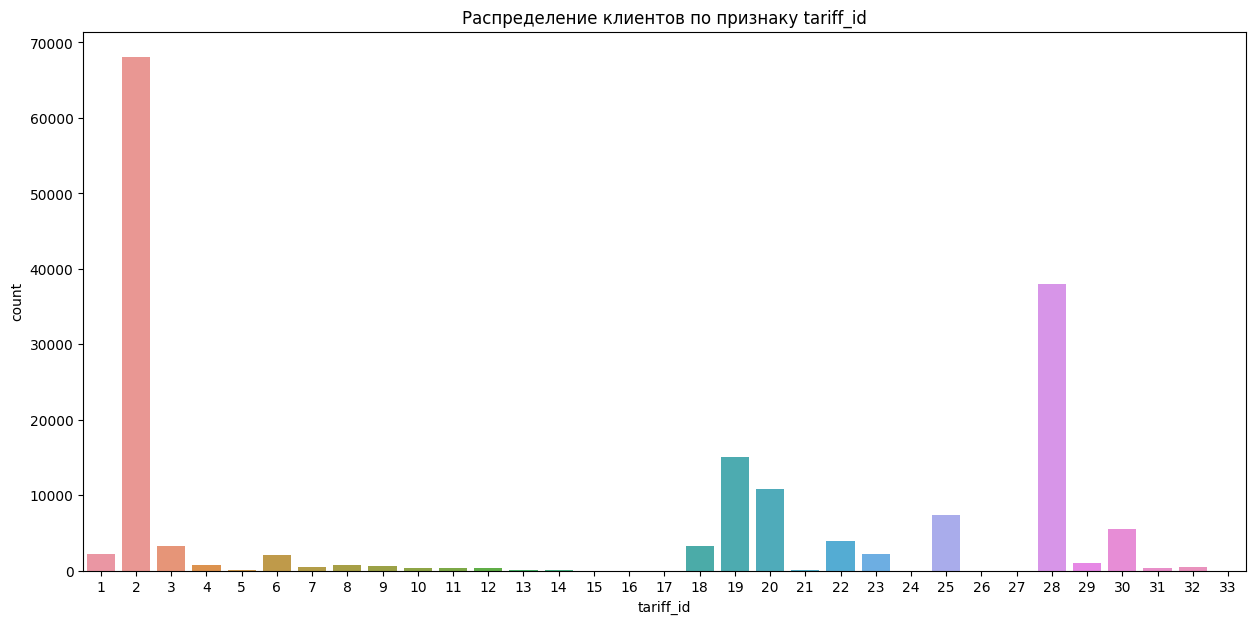

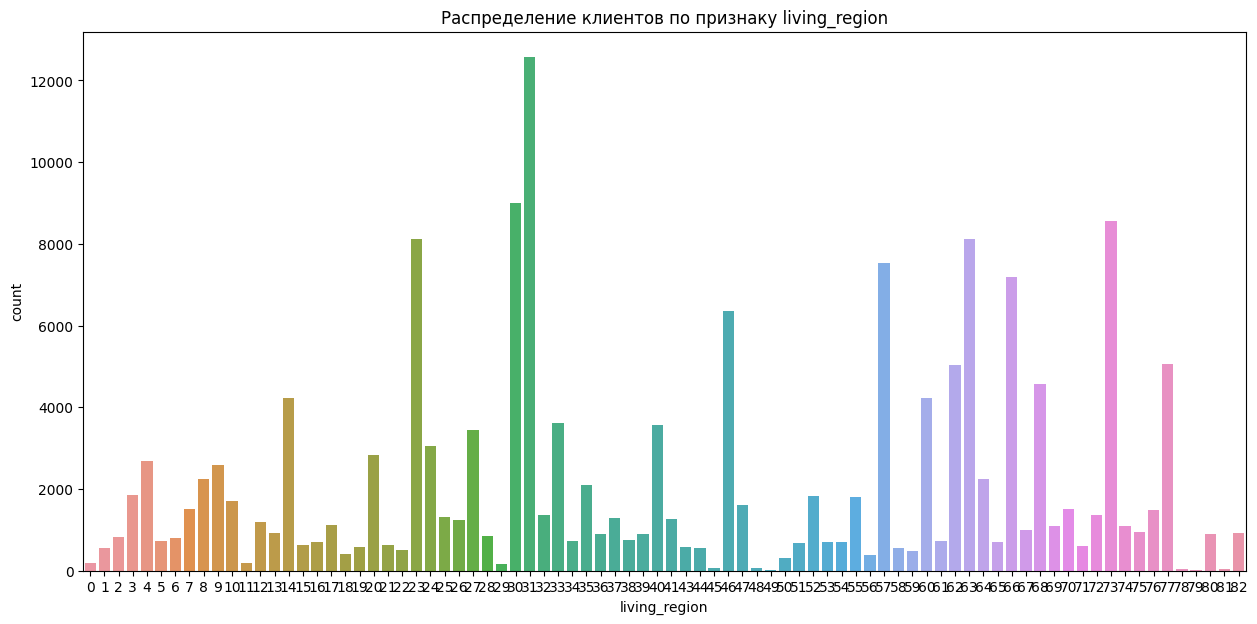

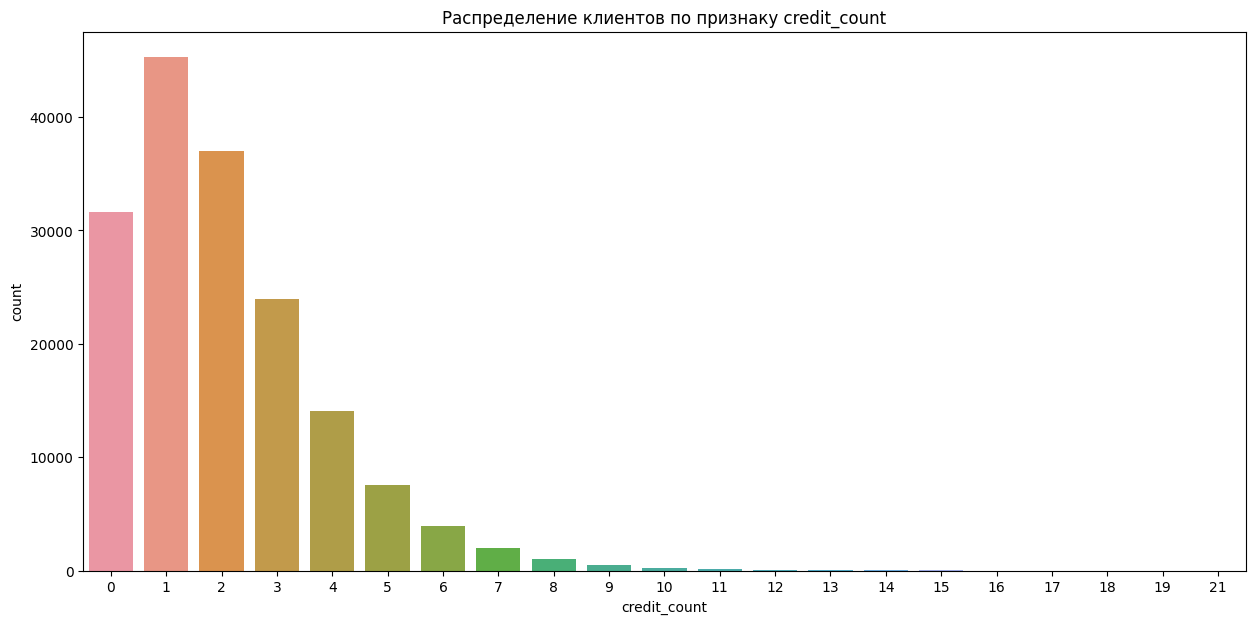

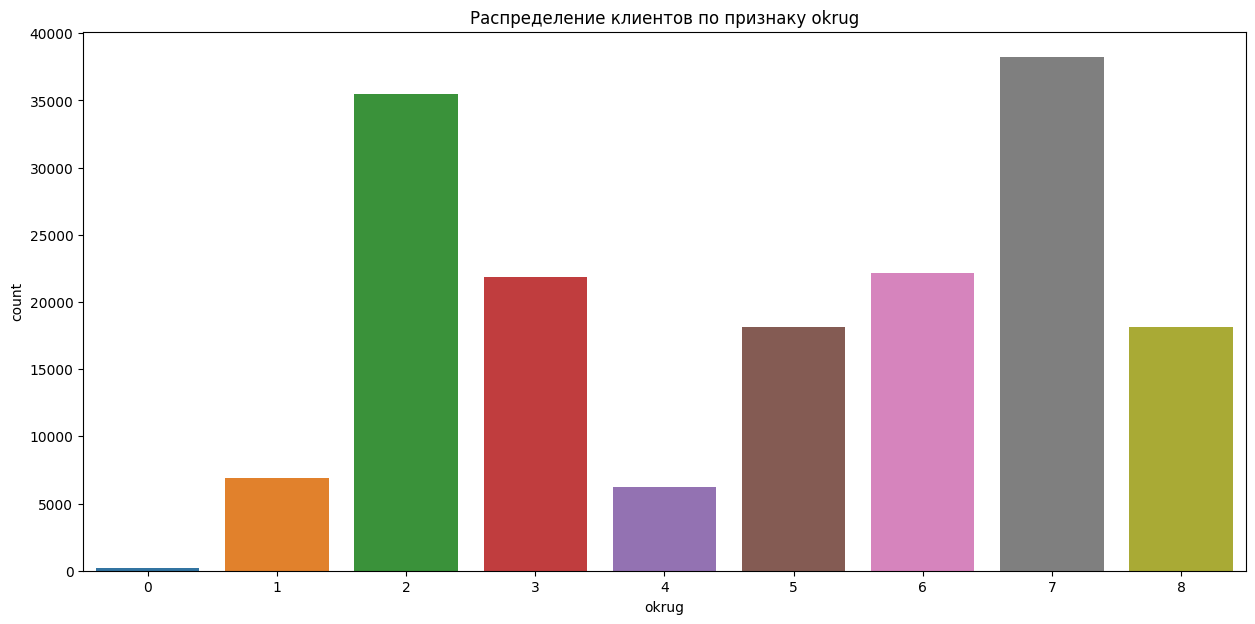

In [62]:
for column in ['age','job_position', 'credit_month', 'tariff_id', 'living_region', 'credit_count','okrug']:
    plt.figure(figsize=(15,7))
    sns.countplot(x = df[column])
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

Вывод:   Из представленных графиков можно сказать следующее:
* Среди клиентов 'клиентов с гендером 1' чуть больше - 52.2%.
* Кредитная карта есть у 15.9% клиентов.
* 3 материальный статус самый частый у клиентов банка 55.8%, 4 - 29% и 2-10%, 1 и 5 имеют по 2% - это не целевые клиенты банка.
* 4 тип образования у половины клиентов банка, 2 также часто встречается у клиентов банка, 5,3 и 1 встречаются редко - не целевые клиенты банка
* у 99% клиентов банка нет просроченных  кредитов, остальные проценты распределены между 2 и 1 просроченными кредитами, можно объеденить их в одну группу
* Количество кредитов у клиентов распределено нормально, чаще всего у клиентов есть 1 и 2 кредита, больше 8 кредитов у клиента встречается крайне редко, есть клиенты с кредитами в других банках.
* Сумма кредита в целом распределена равномерно, имеет смещение влево и достигает чуть больше 25000
* Большинство клиентов имеют внутренню скоринговую оценку от 0.3 до 0.3, данные распределены равномерно.
* Месячная заробатная плата клиентов имеет большой разброс от 5000 и достигает 950 т.р. средняя заробатная плата в регионах имеет медиана 35 т.р, а моду 28 тр
* Возраст клиентов так же имеет нормальное распределние, пик приходится на 28-30 лет.
* 14 тип работы чаще всего встречается в банке, далее в рейтинге занимают места 15,10,2,4,1 с большим отрывом, осталные встречаются крайне редко
* Чаще всего клиенты имеют кредиты в сроком 10 месяцев, реже 12, 24 и 6, в целом кредитование рассматривается в срок от 3 до 36 месяцев
* Самый частый тариф 2, реже используется 28, остальные тарифы были использованы менее 20 тысяч раз
* В целом клиенты банков встречаются во всех регионах, клиенты из 30 региона встречается больше остальных, клиенты из 10, 29,45,48, 49, 78 и 81 меньше всего пользуются услугами банка.

##Анализ клиента банка, с открытым кредитным счетом##

In [73]:
data = df[df['open_account_flg'] == 1]

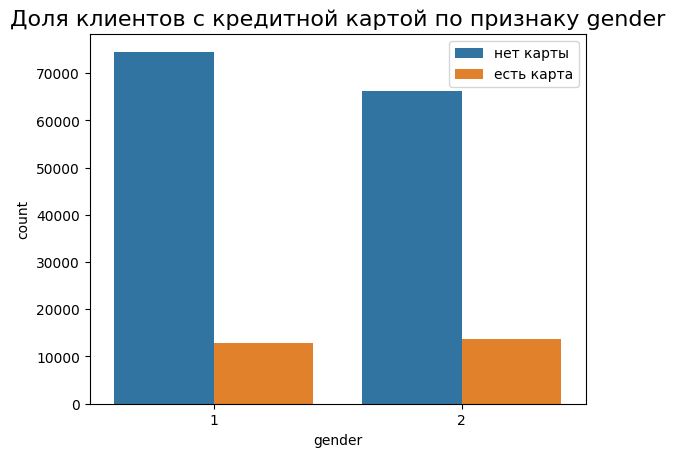

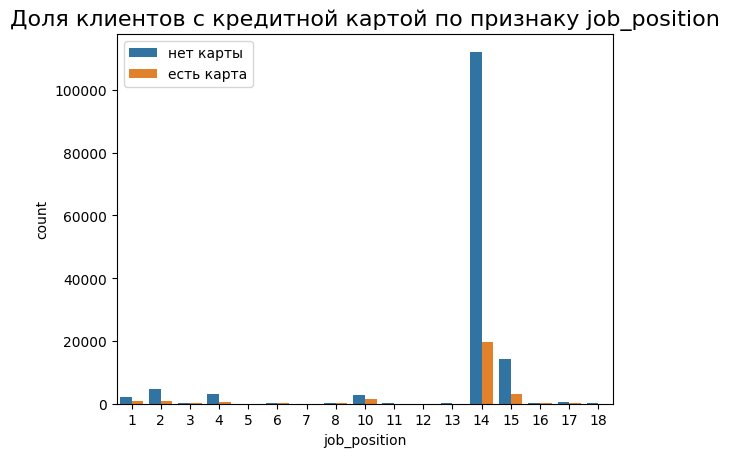

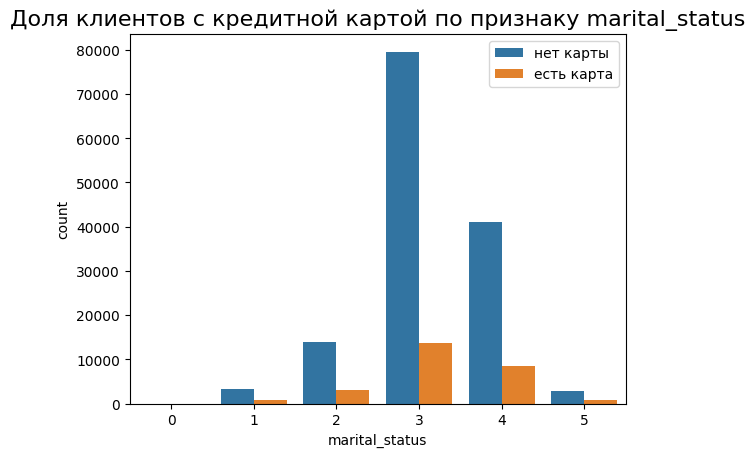

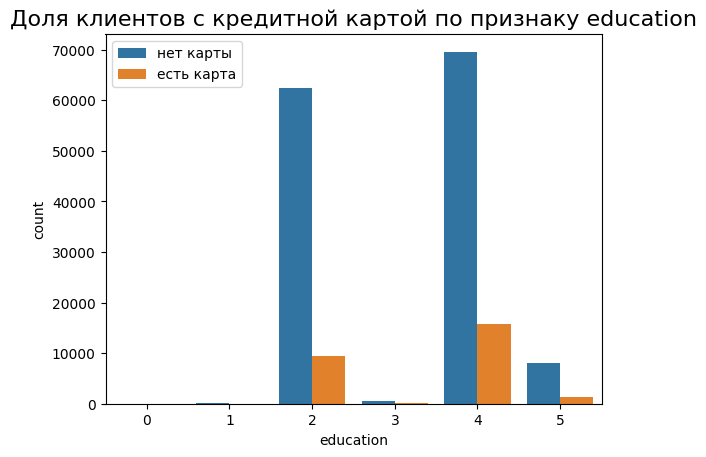

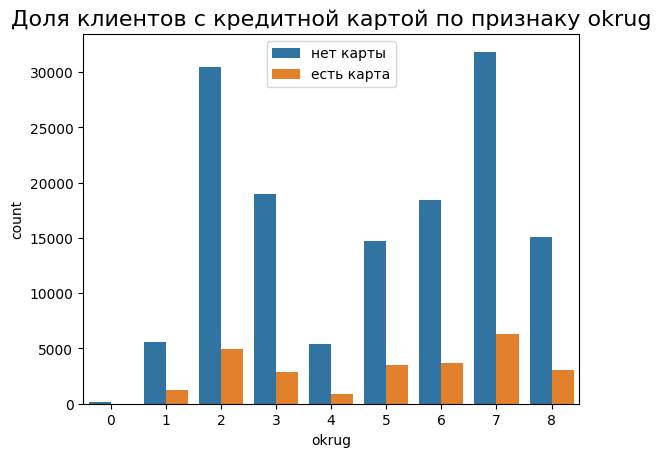

In [81]:
for column in ['gender','job_position', 'marital_status', 'education', 'okrug']:
        ax = sns.countplot(data=df, x=column, hue='open_account_flg');
        plt.title(f'Доля клиентов с кредитной картой по признаку {column}', fontsize = 16, color = 'black')
        plt.legend(['нет карты', 'есть карта'])
        plt.show()

Исходя из графиков можно сделать выод:

1. Чуть чаще открывают кредтные карты представители гендера 2.
2. Клиенты с позицией работы 14 чаще всего берут кредитные карты, чуть реже 15, они же и явлюяются основными клиентами банка. Представители остальных профессий реже пользуются услугами банка, при этом можно сказать, что на вакансии 5, 6 8, 16  у пользователи данные распределены равномерно среди тех, кто берет карты и нет
3. Клиенты с матеоиальным статусом 3 и 4 чаще открывают кредитный счет в банке, данные распределены равномерно как между клиентами с открытыми счетами, так и нет. Реже всего открывают банковские счета клиенты с материальным статусом 1 и 5
4. Клиенты с образованием группы 4 и 2 чаще берут кредитные карты, 5, 3 реже и 1 совсем редко.
5. Основыне клиента банка с кредитной картой проживают в округе 7 и 2, в округах 6, 5 и 8 и 3 клиентов с кредитными картами от 3 до 3.5 тысяч, в 4 меньше всего клиентов с кредитными картами, в районе 1000 .


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


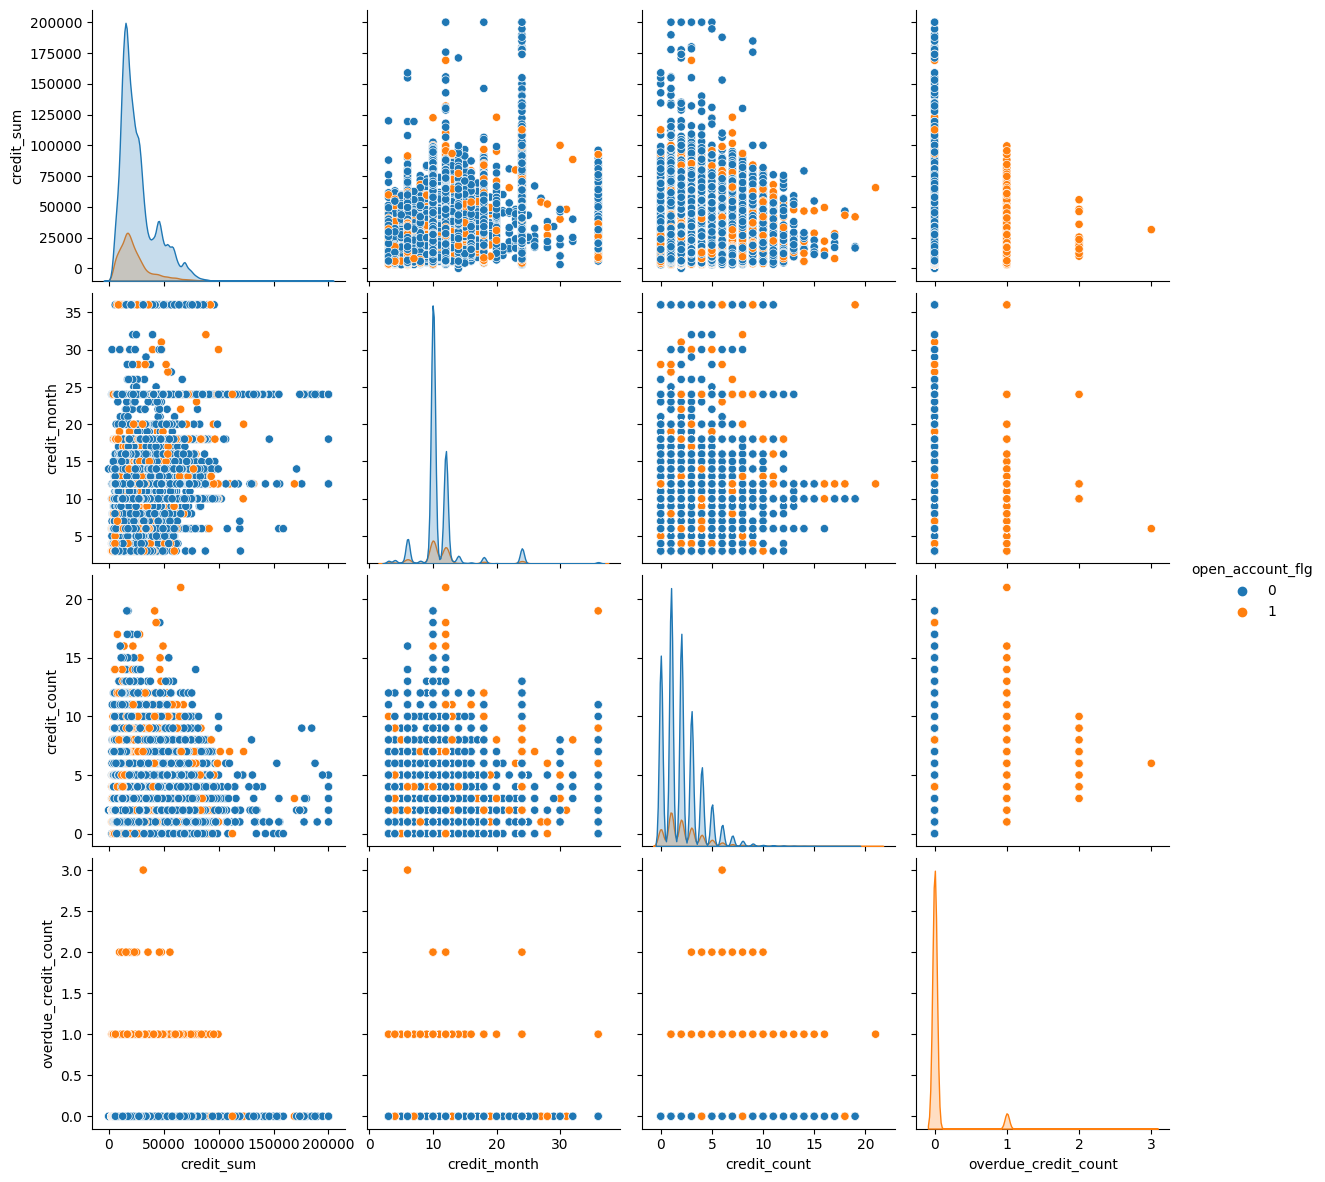

In [84]:
sns.pairplot(df[['credit_sum','credit_month','credit_count', 'overdue_credit_count', 'open_account_flg']], hue='open_account_flg', size=3);

1. У клиентов банка, есть откртые кредиты в других банках сумма которых намного больше, чем у клиентов с открытыми баковскими счетами в данном банке, сумма достигает 25000
2. Клиенты банка берут кредит на разные сроки, есть кредиты на 35 лет с суммами до 100000. Самыми популярными кредитами у клиентов других банков срком 22 месяца и сумами 200000
3. Количество просроченных кредитов у клиента банка в основном не превышает 11 тысяч, но есть  и до 3 просроченных кредитов на сумму 25 тысяч
4. В основном количесвто просроченных кредитов в размере 1 не превышают кредиты до 20 месяцев, но есть и кредиты длительностью 35 месяцев, 2 и 3 просроченных количесвта кредитов у клиентов были взяты в срок 10 и 25 месяцев и 5 соответственно
5. в основном у клиенов банка 1-5 кредита, но в другом банке, в этом диапазоне колисество кредитов у клиенов банка реже, чаще клиенты берут кредиты более 5 месяцев с суммой до 100 тысяч рублей. есть кредит в сроком 20 месяцев и суммой 50 тысяч

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


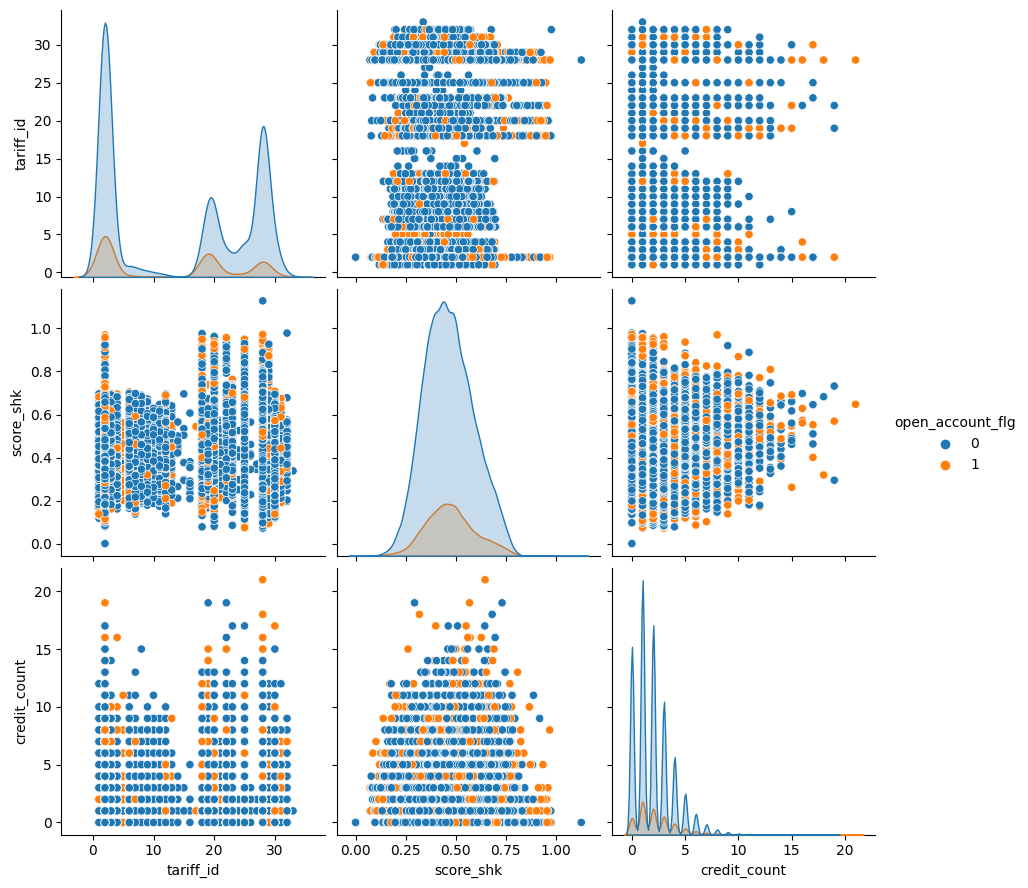

In [158]:
sns.pairplot(df[['tariff_id','score_shk','credit_count', 'open_account_flg']], hue='open_account_flg', size=3);

Целевые клиенты банка использующие тариф  тарифами 5, 18, 19 и 32 чаще берут кредитные карты, Самы не популярные тарифы 8-11, 14-16 (этими тарифами реже всего пользуются в банке, и не берут кредитные карты, 23-24,с 25-27 также не пользуются популярностью для открытия кредитки. В основном благонадежные клиенты не берут кредитки в данном банке, чаще берут с рейтингом 0.1-0.2 и 0.8-1.0

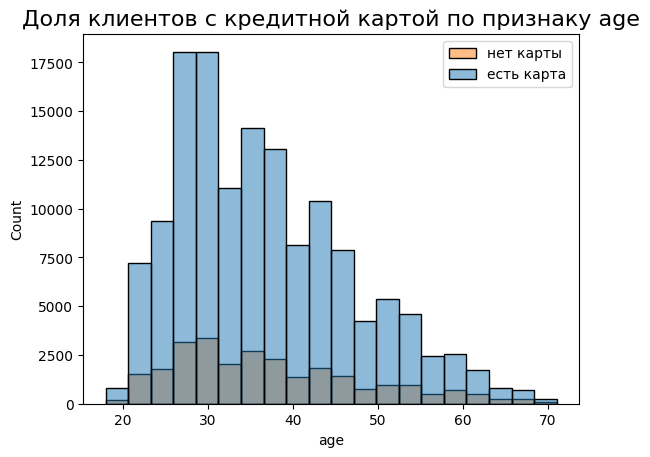

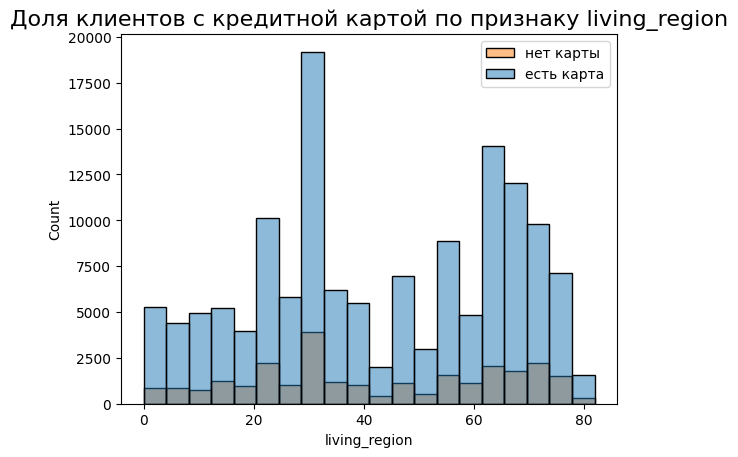

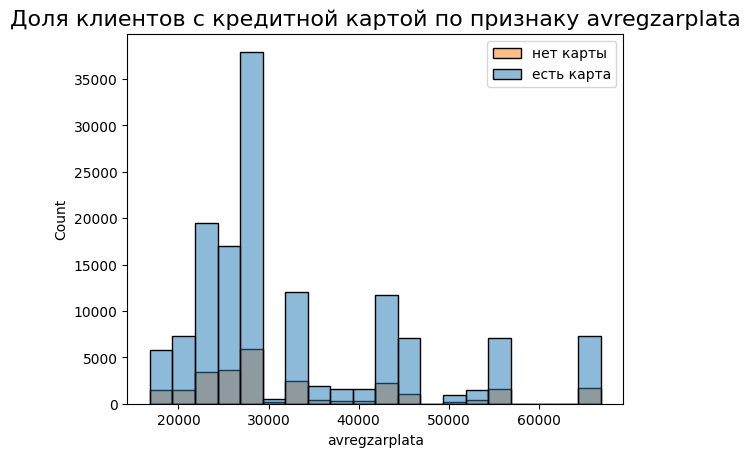

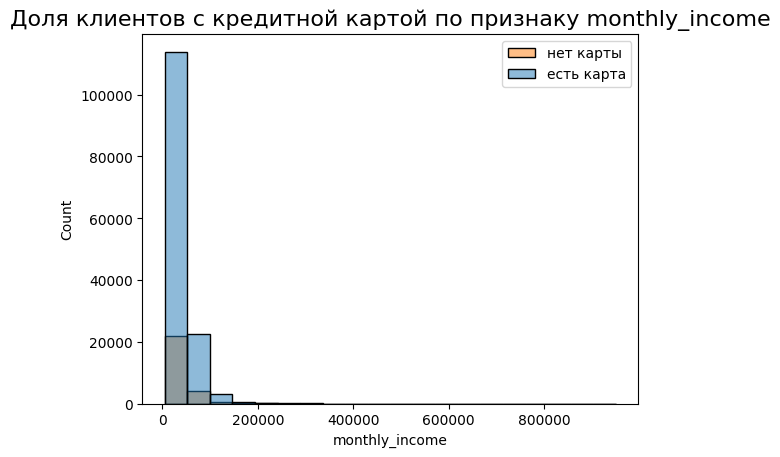

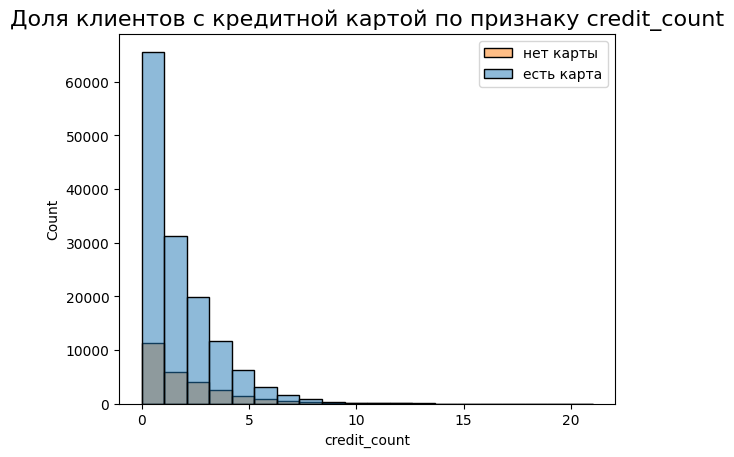

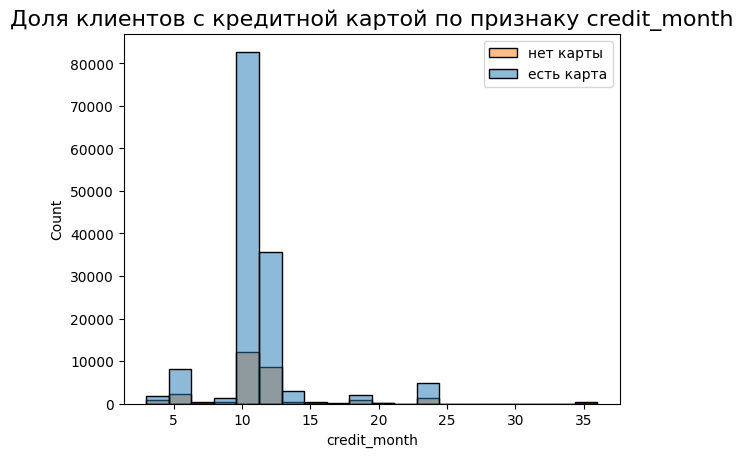

In [157]:
for column in ['age','living_region', 'avregzarplata', 'monthly_income', 'credit_count', 'credit_month']:
        ax = sns.histplot(data=df, x=column, hue='open_account_flg', bins = 20 );
        plt.title(f'Доля клиентов с кредитной картой по признаку {column}', fontsize = 16, color = 'black')
        plt.legend(['нет карты', 'есть карта'])
        plt.show()

На графиках видно, что возраст  клиентов смещен влево, как у клиентов с открытыми картами, так и нет. Это говорит нам о том, что чаще открывают кредитки  люди с 25 по 35 лет.
Клинты пользующиеся услугами банка имеют два пика в регионах 28-32. В этом регионе чаще всего и открывают кредитки клиенты и в регионах  62-70
Чаще кредки берут клиенты со средней заработной платой в регионе от 22-28 т.р, можно сделать акцент на данные регионы и с зарплатой от 5 до 50 тысяч рублей, в этом диапазоне зарплат люди в принципе чаще берут кредиты, судя по графику




H0: параметры Пол, Работа,	Семейный статус, Образование,Федеральный округ, Возраст, Регион, Месячный заработок, Средняя заработная плата в регионе, Сумма кредита, Срок кредитования, Количество просроченных кредитов у клиента, Количество кредитов у клиента, Идентификационный номер тарифа влияют на факт открытия счета в банке
H1: параметры не влияют на открытие счета в банке

In [143]:
x = df.loc[:, ('gender',
              'age',
              'marital_status',
              'job_position',
               'credit_sum',
               'credit_month',
               'education',
               'living_region',
               'monthly_income',
               'credit_count',
               'okrug',
               'avregzarplata',
               'overdue_credit_count',
                'tariff_id')]
y = df.loc[:, 'open_account_flg']

In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [146]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [147]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
x = sm.add_constant(x, prepend=False)
model_R = OLS(y, x).fit()
print(model_R.summary())

                            OLS Regression Results                            
Dep. Variable:       open_account_flg   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     819.6
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:56:24   Log-Likelihood:                -63550.
No. Observations:              167295   AIC:                         1.271e+05
Df Residuals:                  167280   BIC:                         1.273e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
gender                   0.0238 


b0=0.0582

Статистически не значимы возраст, регион проживания  месячный заработок (по ним можно отклонить теорию)

Остальные коээфициенты нам говорят, что при каждом квеличении изменении гендера на 1 % увеличивается количество кредиторов на 00238%, с изменением  материального статуса на 1% увеличивается количество кредиторов на 00083%, с изменением клиентом с образованием на 1% увеличиволось количесвто кредиторов на 0.017%, с изменение количесвта кредитов у пользователей на 1% увеличиволось бы количесвто кредиторов на 0.0069%.ю С изменением закрытых кредитов на 1% у клиентов увеличилось бы кридетеров у банка на 0.81%. Изменение тарифа на 1 % привело бы к уменьшению кредиторов у банка.


коэффициент R показывает насколько хорошо описана наша модель клиента, в настоящий момент на 0.064

Исследование на мультиколениальность

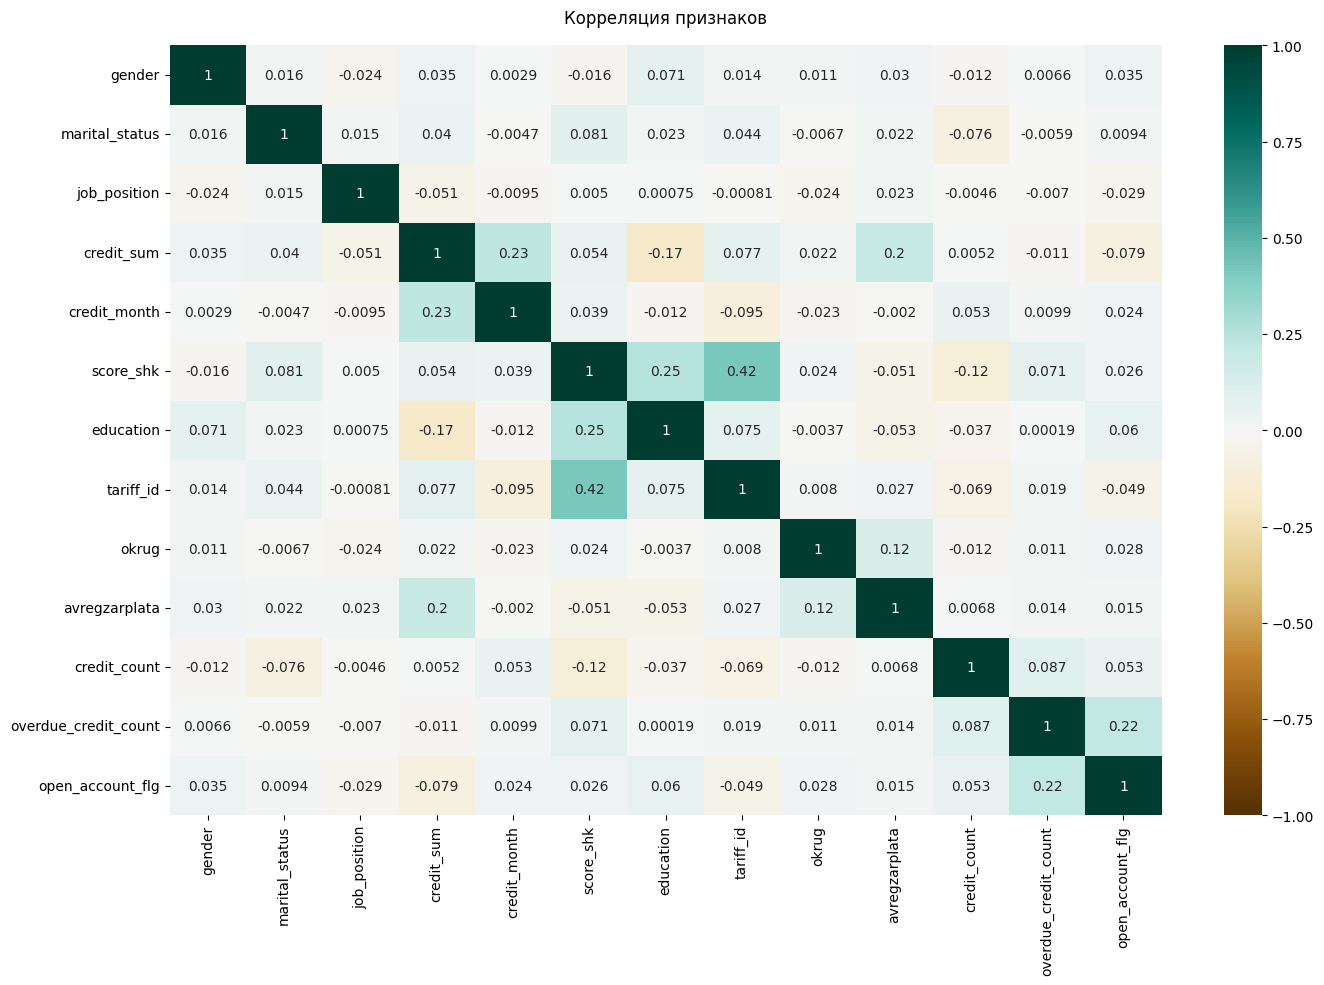

In [211]:
data_cor = df.drop(['client_id', 'age', 'living_region', 'monthly_income'], axis=1)
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(data_cor.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Корреляция признаков', fontdict={'fontsize':12}, pad=16);

 Сильной зависимости между признаками . Больше всего открытие кредитов в банке с количеством не закрытых кредитов, но зависимость всего 22%, поэтому утверждать о влиянии количестве не закрытых кредитов на отток мы не можем.

#Выводы#

Вывод: выделения портрета клиентов:

Основным клиентом банка, которые откроют кредитный счет, считаются
 * клиенты 2 гендера (1 гендер реже открывает кредитный счет)
 * клиенты возраста с 25 по 35 лет (но так как тест показал, что этот параметр не так сильно влияет на параметр, можно рассматривать клиентов всех возрастных групп)
 * На рабочей позиции 14 ( этот признак использовать нельзя, так у этой группы больше всего клиентов в банке, возможно, у них зарплатная карта этого банка, поэтому у нее клиенты как пользуются так и нет кредитками в данном банке)
 * из федерального округа  7 и 2 и региона 28-32, 62-70  и средней зарплатой в регионе от 22-28 тысяч
 * С образованием группы 4 и 2
 * С месячным зароботком от 5 до 50 тысяч (но так как тест показал, что этот параметр не так сильно влияет на параметр, можно рассматривать клиентов всех заробатных групп)
 чаще клиенты закрывают кредиты вовремя
 * С тарифным номером 5 18, 19 и 32 и имеющим рейтинг 0.1-0.2 и 0.8-1.0. Так как для банка приоритетней более высокий кредитный рейтинг, то нужно отсортировать клиентов по нему, чтобы работать с данным типом клиентов

*Это клиенты в основном с количеством кредитов от 1 до 5  на 5 месяцев с суммой до 100 тысяч рублей и с количеством просроченных кредитов до 3*

Клиенты, которые не будут открывать карту в банке, по анализу открытых карт :
 * клиенты 1 гендера
 * клиенты возраста 18  и старше 65
 * На рабочей позиции 5, а также остальных позициях крайне редко берут кредит в данном банке
 * из федерального округа 1 и 4 и региона 81, 45, 49, 78, 79 и средней зарплатой в регионе от 30 до 50 тысяч
 * С образованием 1, 3 и 5
 * С месячным зароботком более 100 тысяч
 * С тарифным номером 8-11, 14-16, 23-24,с 25-27 (возможно это не амые привлекательные тарифы)



